# BHC Simband/ DANA Study

In [1]:
import os, os.path
import pandas as pd
import glob
import datetime
import json
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = os.getcwd()
files = os.listdir(path + '/bhc_patient_data')
files.remove('.DS_Store')

## Opening and concatenating the data for all patients

In [ ]:
# open the zipped tar files and save to patient directory

import tarfile

for file in files:
    contents = (glob.glob('{}/*'.format(file)))
    for item in contents:
        if (str(item[-3:]) == 'tgz'):
            path = (item.split('/')[0])
            name = (item.split('/')[1])
            with tarfile.open(item) as tar:
                print(name)
                tar.extractall(path=path)

In [10]:
# function to concatenate specific test type within patient subdirectories

def concat_test_files(input_test_file_name, patient_files_list): # takes keyword input for test name
    df_list = []
    for file in patient_files_list:
        contents = (glob.glob('{}/*'.format(file)))
        for item in contents:
            if (str(item[-3:]) == 'csv'):
                if (item.find(input_test_file_name) > 0):
                    temp_df = pd.DataFrame.from_csv(item)
                    df_list.append(temp_df)

    output_df = pd.concat(df_list, ignore_index=True)
    return(output_df)

In [15]:
cd bhc_patient_data/

/Users/jeff/Desktop/K2_DataScience/DANA_Simband_copy/SimBand_BHC/bhc_patient_data


In [73]:
# creating df for reaction tests

go_no_go = concat_test_files('Go No Go', files)
simp_rxn_time = concat_test_files('Simple Reaction Time', files)
proc_rxn_time = concat_test_files('Procedural Reaction Time', files)

In [20]:
# function to filter csv file by keyword before writing to df

import csv
import re

def filter_simband_csv(input_file, valid_string_list): # takes input file and list of fields of interest
    with open(input_file, 'r') as f_in:
        with open('output_file', 'w') as f_outfile:
            # define header column
            f_outfile.write("ts,cts,ddid,sdid,sdtid,mid,mv,uid,data\n")       
            for line in f_in:
                for search_str in valid_string_list:
                    if bool(re.search(search_str, line)):
                        f_outfile.write(line)

    df_temp = pd.DataFrame.from_csv('output_file')
    return(df_temp)

In [21]:
import time

# function to parse ts string into date time format

def format_time(ts):
    formatted_ts = time.strftime("%a %d %b %Y %H:%M:%S", time.gmtime(ts/ 1000.0))
    return(formatted_ts)

In [22]:
# all fields in SimBand stream
fields_of_interest=['age',
 'ecg\\"',
 'ecgBeats',
 'ecgBeatsIbi',
 'gsr',
 'gsrDac0',
 'gsrDac1',
 'gsrStatus',
 'heartBeat',
 'heartRateMonitoring',
 'height',
 'hrvAVHR',
 'ppg\\d\\"',
 'ppg4BeatsIbi',
 'ppg4BeatsInfo',
 'ppg4BeatsTDE',
 'ppgSelection',
 'setupBloodPressureDiastolic',
 'setupBloodPressureSystolic',
 'setupHeartRate',
 'setupPulseArrivalTime',
 'skinTemperature',
 'weight']

In [23]:
# function to concatenate raw Simband streams from Simband subdirectories from each patient subdirectories
# filters input csv to include only fields of interest (valid strings) using filter_simband_csv function
# formats ts string to time stamp and saves as date time object
# outputs a data frame

import datetime

def concat_simband_files(patient_files_list, valid_strs): # takes keyword input for test name
    df_list = []
    for file in patient_files_list:
            file_contents = (glob.glob('{}/*/*'.format(file)))
            for sub_file in range(len(file_contents)):
                name = file_contents[sub_file]
                subject_id = name.split('/')[0] # add subject identifier to data
                temp_df = filter_simband_csv(name, valid_strs)
                temp_df['subject_id'] = subject_id
                df_list.append(temp_df)
    output_df = pd.concat(df_list)
    output_df.reset_index(inplace=True) # reset index so timestamp can be formatted
    output_df['parsed_ts'] = output_df.ts.apply(format_time) # apply timestamp parsing function
    output_df['parsed_ts'] = pd.to_datetime(output_df['parsed_ts']) # setting parsed string as a date time object
    output_df['parsed_cts'] = output_df.cts.apply(format_time) # apply timestamp parsing function to cts
    output_df['parsed_cts'] = pd.to_datetime(output_df['parsed_cts']) # setting cts parsed string as a date time object
    return(output_df)

In [24]:
# concatenate all sim band data into csv

all_simband_data = concat_simband_files(files, fields_of_interest)

## Export full data set to csv

In [25]:
# save df to csv

all_simband_data.to_csv('concatenated_simband_data.csv', sep=',')

## Import csv (for subsequent analysis when not doing full processing)

This short analysis was generated to show Lindsay at Samsung what I mean by 'list' data:

In [5]:
all_simband_data = pd.DataFrame.from_csv('all_simband_data.csv')

In [48]:
short_simband_data = all_simband_data[0:100000]

In [51]:
short_unparsed_data = short_simband_data[['ts', 'cts', 'ddid', 'sdid', 'sdtid', 'mid', 'mv', 'uid', 'data']]

In [52]:
short_unparsed_data

ts            cts  ddid                              sdid  \
0      1494862807998  1494867174846   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
1      1494862807998  1494867174838   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
2      1494862807998  1494867174914   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
3      1494862807998  1494867174914   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
4      1494862808164  1494867177118   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
5      1494862808237  1494867175758   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
6      1494862808237  1494867175749   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
7      1494862808237  1494867175724   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
8      1494862808407  1494867175993   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
9      1494862808407  1494867176018   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
10     1494862808407  1494867175741   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
11     1494862808407  1494867175674   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
12     1494862808407  1494867175699   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
13     1494862808407  1494867175536   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
14     1494862808407  1494867175801   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
15     1494862808407  1494867175784   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
16     1494862808407  1494867175978   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
17     1494862808407  1494867174876   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
18     1494862808407  1494867175633   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
19     1494862808407  1494867175768   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
20     1494862808407  1494867175572   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
21     1494862808407  1494867177605   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
22     1494862808704  1494867175859   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
23     1494862808704  1494867175911   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
24     1494862808704  1494867175911   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
25     1494862808704  1494867175851   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
26     1494862808865  1494867177810   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
27     1494862808907  1494867175833   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
28     1494862808907  1494867176151   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
29     1494862808907  1494867176052   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
...              ...            ...   ...                               ...   
99970  1494862222907  1494864770086   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99971  1494862222907  1494864769614   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99972  1494862222907  1494864769479   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99973  1494862222907  1494864769705   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99974  1494862222907  1494864769720   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99975  1494862222907  1494864773588   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99976  1494862222907  1494864769767   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99977  1494862222907  1494864769735   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99978  1494862222907  1494864770611   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99979  1494862222907  1494864769628   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99980  1494862222907  1494864770101   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99981  1494862223407  1494864771192   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99982  1494862223407  1494864770564   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99983  1494862223407  1494864771132   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99984  1494862223407  1494864770914   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99985  1494862223407  1494864771630   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99986  1494862223407  1494864771646   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99987  1494862223407  1494864770944   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
99988  1494862223407  1494864769599   NaN  c941c86d06ba4aa0b621601b1

In [53]:
def format_json_value_list(json_data):
    val = 0
    n = json.loads(json_data)
    data_val = n[n['payload']['field']]
    if type(data_val) == list:
        numeric_data_val = [float(i) for i in data_val] # convert to numeric data type
        #val = np.nanmean(numeric_data_val)
    else:
        numeric_data_val = data_val
    return(numeric_data_val)

In [56]:
short_unparsed_data['field_stream'] = short_unparsed_data.data.apply(format_json_field)
short_unparsed_data['field_stream_value'] = short_unparsed_data.data.apply(format_json_value_list)

/Users/jeff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jeff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [85]:
list_streams = short_unparsed_data[short_unparsed_data.field_stream == 'ecg']

In [86]:
#list_streams = list_streams[['ts', 'field_stream','field_stream_value']]
list_streams.head()

ts            cts  ddid                              sdid  \
13  1494862808407  1494867175536   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
27  1494862808907  1494867175833   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
61  1494862809407  1494867176384   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
73  1494862809907  1494867176685   NaN  c941c86d06ba4aa0b621601b11ccbc6d   
97  1494862810407  1494867177375   NaN  c941c86d06ba4aa0b621601b11ccbc6d   

                                 sdtid                               mid  mv  \
13  dte5f9851dca3b4063a6440a3aa1142bac  281dc6b450254f4ca5abd744c19ad4b2  62   
27  dte5f9851dca3b4063a6440a3aa1142bac  15220ffef3f246c0a3085c7c9f7f365c  62   
61  dte5f9851dca3b4063a6440a3aa1142bac  f81c54d65f5f4faa86069a6d02410d08  62   
73  dte5f9851dca3b4063a6440a3aa1142bac  9a86905e6bc3461a86796dc137e5c1cb  62   
97  dte5f9851dca3b4063a6440a3aa1142bac  6a9a2d81d9ef4877b588818983a20913  62   

                                 uid  \
13  2466b59596b94037a851d2002287be85   
27  2466b59596b94037a851d2002287be85   
61  2466b59596b94037a851d2002287be85   
73  2466b59596b94037a851d2002287be85   
97  2466b59596b94037a851d2002287be85   

                                                 data field_stream  \
13  {"payload":{"field":"ecg","stream":"5482d03f",...          ecg   
27  {"payload":{"field":"ecg","stream":"5482d03f",...          ecg   
61  {"payload":{"field":"ecg","stream":"5482d03f",...          ecg   
73  {"payload":{"field":"ecg","stream":"5482d03f",...          ecg   
97  {"payload":{"field":"ecg","stream":"5482d03f",...          ecg   

                                   field_stream_value  
13  [-3815.801, -3809.0366, -3775.0164, -3785.3691...  
27  [-4157.2197, -4185.074, -4231.5195, -4259.521,...  
61  [-3707.8381, -3489.653, -3255.219, -3314.1658,...  
73  [-3799.6838, -3821.7036, -3898.7695, -3949.338...  
97  [-3870.8005, -3891.3782, -3878.2258, -3838.926...

In [81]:
var_list = list_streams.field_stream_value[list_streams.index == 13]
var_list.values

array([ [-3815.801, -3809.0366, -3775.0164, -3785.3691, -3821.6067, -3814.415, -3787.8835, -3793.2727, -3814.279, -3822.787, -3813.753, -3792.5325, -3781.3335, -3784.0024, -3775.1438, -3761.6458, -3768.4106, -3781.1877, -3791.154, -3825.807, -3887.317, -3943.0508, -3969.2659, -3954.2385, -3915.1357, -3902.0508, -3909.9368, -3867.0732, -3771.3618, -3708.015, -3705.27, -3710.3447, -3707.4436, -3725.9148, -3734.8357, -3703.5303, -3748.9714, -3939.957, -4057.9873, -3928.8538, -3705.9905, -3511.2617, -3310.1997, -3242.5999, -3453.9333, -3742.581, -3860.5134, -3850.243, -3851.2778, -3892.8035, -3929.197, -3922.099, -3901.4553, -3920.5483, -3955.3154, -3958.3416, -3953.3718, -3973.9297, -3999.253, -4007.3755, -4013.3508, -4040.6348, -4089.6978, -4133.81]], dtype=object)

## Parsing the json data objects and collapsing the timeseries

In [55]:
import json

# functions to parse data in json_object

def format_json_field(json_data):
    n = json.loads(json_data)
    field = n['payload']['field']
    return(field)

def format_json_value(json_data):
    val = 0
    n = json.loads(json_data)
    data_val = n[n['payload']['field']]
    if type(data_val) == list:
        numeric_data_val = [float(i) for i in data_val] # convert to numeric data type
        val = np.nanmean(numeric_data_val)
    else:
        val = data_val
    return(val)


# function to filter concatenated csvs
# first applies json parsing functions
# then removes non-relevant simband data columns
# then collapses time stamp by given period of time (in seconds)

def parse_and_filter(concat_df): # accepts concatenated df and time period in format "*S' for seconds
    concat_df['field_stream'] = concat_df.data.apply(format_json_field)
    concat_df['field_stream_value'] = concat_df.data.apply(format_json_value)
    concat_df['field_stream_value'] = concat_df['field_stream_value'].apply(pd.to_numeric, errors='coerce')
    filtered_concat_df = concat_df[['parsed_ts', 'parsed_cts','field_stream',
                                    'field_stream_value', 'subject_id']]
    return(filtered_concat_df)

# collapses time stamp for filtered collapsed df by given period of time (in seconds)
def collapse_timeseries(parsed_filtered_df, time_period):
    parsed_filtered_df.reset_index(drop=True, inplace=True)
    parsed_filtered_df.set_index('parsed_ts', inplace=True)
    parsed_filtered_df_grouped = parsed_filtered_df.groupby(['field_stream', 'subject_id'])
    parsed_filtered_df_grouped_collapsed = parsed_filtered_df_grouped.resample(time_period).mean()
    parsed_filtered_df_grouped_collapsed.reset_index(drop=False, inplace=True)
    return(parsed_filtered_df_grouped_collapsed)

## Run data through pipeline

In [49]:
# use this short frame for testing
short_simband = all_simband_data[0:10000]

In [50]:
# filter and parse all simband data
filtered_all_simband_data = parse_and_filter(all_simband_data)

/Users/jeff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: Mean of empty slice


In [142]:
# collapse all simband field streams to 20 secod periods (3 per minute)
# don't run until plotting
#filtered_collapsed_all_simband_data = collapse_timeseries(filtered_all_simband_data, '20S')

## Formatting Patient IDs to match across all tests and adding 'group' information

group = 1 is patient (affected)
group = 2 is control (unaffected)

In [305]:
# format subject id's in go_no_go data for join (make match sim band data)

cognative_tests = [go_no_go, simp_rxn_time, proc_rxn_time]

for test in cognative_tests:
    # strip whitespace from first name field
    test['Subject First Name'] = test['Subject First Name'].str.rstrip(to_strip=None)

    # concatenate first and last name to make subject id that matches simband data
    test['subject_id'] = test['Subject First Name'] + ' ' + test['Subject Last Name']

    # format individual entries to match (likely transcription errors)

    test.subject_id = test.subject_id.apply(lambda x: 'MA-OTS BHC0100-1 repeat' 
                                                    if 'MA-OTS REPEAT BHC0100-1' in x else x)

    test.subject_id = test.subject_id.apply(lambda x: 'KT-OTS BHC0227-2' 
                                                    if 'KT-OTS BHC0227-1' in x else x)

    test.subject_id = test.subject_id.apply(lambda x: 'M-M OTS BHC0303-1' 
                                                    if 'M-M OTS BHC 0303-1' in x else x)

    test.subject_id = test.subject_id.apply(lambda x: 'AC-OTS REPEAT BHC0111-1' 
                                                    if 'AC-OTS Redo BHC0111-1' in x else x)

In [58]:
# import patient group information (control vs affected information)

patient_group = pd.DataFrame.from_csv('/Users/jeff/Desktop/K2_DataScience/DANA_Simband_copy/SimBand_BHC/OrthostaticTestingSt_DATA_2018-06-16_0913.csv')
patient_group.reset_index(drop=False, inplace=True)

In [59]:
# create a reference frame with subject id and 'Last Name' (what BHC calls the BHC id)

reference_frame = proc_rxn_time[['Subject First Name', 'Subject Last Name', 'subject_id']]
reference_frame.columns = ['Subject First Name', 'bhc_id', 'subject_id']

In [60]:
# create dictionaries out of frames to compare

ref_dict = reference_frame.set_index('bhc_id')['subject_id'].to_dict()
patient_group_dict = patient_group.set_index('bhc_id')['reg_group'].to_dict()

In [61]:
# generating a dictionary that matches subject id to the subject group

subject_id_to_group = {}
for key, value in ref_dict.items():
    if key in patient_group_dict:
        subject_id_to_group[value]= patient_group_dict[key]

In [64]:
# a few didn't make it to the dictionary; I added them manually

subject_id_to_group['MA-OTS BHC0100-1 repeat'] = subject_id_to_group['MA-OTS BHC0100-1']
subject_id_to_group['KT-OTS BHC0227-2'] = 2
subject_id_to_group['M-M OTS BHC0303-1'] = 2
subject_id_to_group['AC-OTS BHC0111-1'] = 1

In [67]:
# adding the subject group to the all sim band data set

filtered_all_simband_data['group_type'] = filtered_all_simband_data['subject_id'].apply(lambda x: subject_id_to_group[x])

/Users/jeff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Remove patients with erroneous Simband timestamps
Two patients had erroneous time stamps (time > 1 day; should only be 45 min to 1 hour)

In [100]:
# removing subjects with incorrect simband times

filtered_all_simband_data = filtered_all_simband_data[filtered_all_simband_data.subject_id != 'LW-OTS BHC0048-1']
filtered_all_simband_data = filtered_all_simband_data[filtered_all_simband_data.subject_id != 'AH-OTS BHC0221-1']

## Format Timestamps and Dates to match across all test types

In [102]:
filtered_all_simband_data.head()

parsed_ts          parsed_cts        field_stream  \
0 2017-05-15 15:40:07 2017-05-15 16:52:54  ecgBeatsConfidence   
1 2017-05-15 15:40:07 2017-05-15 16:52:54            ecgBeats   
2 2017-05-15 15:40:07 2017-05-15 16:52:54         ecgBeatsIbi   
3 2017-05-15 15:40:07 2017-05-15 16:52:54         ecgBeatsIbi   
4 2017-05-15 15:40:08 2017-05-15 16:52:57        ppg4BeatsTDE   

   field_stream_value               subject_id  group_type  
0            4.000000  MA-OTS BHC0100-1 repeat           1  
1            1.000000  MA-OTS BHC0100-1 repeat           1  
2            0.686767  MA-OTS BHC0100-1 repeat           1  
3            0.686767  MA-OTS BHC0100-1 repeat           1  
4            1.000000  MA-OTS BHC0100-1 repeat           1

In [103]:
# the parsed time stamps are off by 5 hours! Not sure why. For now I'm just going to shift back 5 hours.

filtered_all_simband_data.parsed_ts = filtered_all_simband_data.parsed_ts - pd.Timedelta(hours=5)

In [105]:
# the parsed cts are also off by 5 hours; shift back 5 hours.

filtered_all_simband_data.parsed_cts = filtered_all_simband_data.parsed_cts - pd.Timedelta(hours=5)

In [202]:
# convert and format dates and times for the cognative tests

def convert_date(data_frame):
    temp = pd.DataFrame()
    temp['date_time'] = data_frame.Date + " " + data_frame.Time
    date_obj_list = []
    for date in temp['date_time']:
        if date[0] == '0':
            date_obj = datetime.datetime.strptime(date, '%m/%d/%Y %H:%M')
            date_obj_list.append(date_obj)
        else:
            date_obj = datetime.datetime.strptime(date, '%d %b %Y %H:%M')
            date_obj_list.append(date_obj)
    return(date_obj_list)

In [308]:
# converting date times for all cognative tests

cognative_tests = [go_no_go, simp_rxn_time, proc_rxn_time]

for test in cognative_tests:
    test['parsed_ts'] = convert_date(test)    

In [300]:
# name cognative test dfs
go_no_go.name = 'gng'
simp_rxn_time.name = 'srt'
proc_rxn_time.name = 'prt'
filtered_all_simband_data.name = 'sim'

all_tests = [go_no_go, simp_rxn_time, proc_rxn_time, filtered_all_simband_data]

In [ ]:
go_no_go.subject_id

In [312]:
# make list contining a dictionary of start and stop for each test for each patient

all_test_times = []

for test in all_tests:
    patient_list = list(test["subject_id"].unique())
    test_dict = {}
    for patient in patient_list:
        start = test[test['subject_id'] == patient].parsed_ts.min()
        stop = test[test['subject_id'] == patient].parsed_ts.max()
        test_dict[patient] = (test.name, start,stop)
    all_test_times.append(test_dict)

In [317]:
# make df of each dictionary containing start and stop times

df_list = []
for test in all_test_times:
    test_df = pd.DataFrame.from_records(test)
    df_list.append(test_df)

In [366]:
all_test_times = pd.concat(df_list)
all_test_times = all_test_times.T

In [369]:
all_test_times.columns = ['test_gng', 'gng_start', 'gng_stop', 
                          'test_srt', 'srt_start', 'srt_stop',
                          'test_prt', 'prt_start', 'prt_stop',
                          'test_sim', 'sim_start', 'sim_stop']

In [594]:
all_test_times[['gng_stop', 'srt_stop', 'prt_stop']].head(n=10)

gng_stop             srt_stop  \
AA-OTS BHC0297-1         2017-07-17 11:47:00  2017-07-17 11:46:00   
AC-OTS BHC0111-1         2017-04-17 14:55:00  2017-04-17 14:54:00   
AC-OTS REPEAT BHC0111-1  2017-06-21 11:59:00  2017-06-21 11:58:00   
AD-OTS BHC0030-1         2017-05-22 12:02:00  2017-05-22 12:00:00   
AG-OTS BHC0206-1         2017-07-07 16:26:00  2017-07-07 16:25:00   
AH-OTS BHC0221-1         2017-05-09 13:38:00  2017-05-09 13:36:00   
AI-OTS BHC0296-1         2017-06-30 12:02:00  2017-06-30 12:01:00   
AL-OTS BHC0070-1         2017-06-27 13:03:00  2017-06-27 13:01:00   
AM-OTS BHC0277-1         2017-05-30 11:26:00  2017-05-30 11:24:00   
AM-OTS BHC0298-1         2017-07-13 12:45:00  2017-07-13 12:43:00   

                                    prt_stop  
AA-OTS BHC0297-1         2017-07-17 11:44:00  
AC-OTS BHC0111-1         2017-04-17 14:51:00  
AC-OTS REPEAT BHC0111-1  2017-06-21 11:56:00  
AD-OTS BHC0030-1         2017-05-22 11:58:00  
AG-OTS BHC0206-1         2017-07-07 16:23:00  
AH-OTS BHC0221-1         2017-05-09 13:34:00  
AI-OTS BHC0296-1         2017-06-30 11:59:00  
AL-OTS BHC0070-1         2017-06-27 12:59:00  
AM-OTS BHC0277-1         2017-05-30 11:22:00  
AM-OTS BHC0298-1         2017-07-13 12:41:00

In [597]:
test = (all_test_times.sim_stop - all_test_times.gng_stop)

In [598]:
test.mean()

Timedelta('0 days 00:02:08.065217')

In [405]:
# get rid of nan's so for testing concurrency
all_test_times_nonan = all_test_times.dropna(axis=0, how='any')

In [ ]:
# check to see if cognative test times fall within simband recording time

patient_list = list(all_test_times_nonan.index.unique())

for patient in patient_list:
    temp_data = all_test_times_nonan[all_test_times_nonan.index == patient]
    time_1 = temp_data.gng_start[0]
    time_2 = temp_data.gng_stop[0]
    time_3 = temp_data.srt_start[0]
    time_4 = temp_data.srt_stop[0]
    time_5 = temp_data.prt_start[0]
    time_6 = temp_data.prt_stop[0]
    
    time_sim = temp_data.sim_start[0]
    time_sim2 = temp_data.sim_stop[0]
    if (time_sim2 >= time_1 >= time_sim) & (
        time_sim2 >= time_2 >= time_sim) & (
        time_sim2 >= time_3 >= time_sim) & (
        time_sim2 >= time_4 >= time_sim) & (
        time_sim2 >= time_5 >= time_sim) & (
        time_sim2 >= time_6 >= time_sim):
        print('in range')
    else:
        print(patient, 'out of range')

In [416]:
sim_run_time = (all_test_times_nonan.sim_stop - all_test_times_nonan.sim_start)

In [420]:
# mean run time of simband collection
sim_run_time.mean()

Timedelta('0 days 00:42:49.260869')

### Two subjects had non-concurent cognative tests and simband data

for AI-OTS BHC0296-1 the first prt test was conducted before the simband began collecting data

for M-M OTS BHC0303-1 the simband stopped collecting data midway through the testing period

In [527]:
# subject groups
affected = filtered_all_simband_data[filtered_all_simband_data.group_type == 1]
control = filtered_all_simband_data[filtered_all_simband_data.group_type == 2]

affected_subjects = list(affected.subject_id.unique())
control_subjects = list(control.subject_id.unique())

# remove incomplete subject
control_subjects.remove('KT-OTS BHC0227-2')

In [577]:
print(len(affected_subjects))
print(len(control_subjects))

23
22


In [549]:
important_field_streams = ['ecg', 'gsr', 'ppg1', 'ppg2', 'ppg3', 'ppg4', 'ppg5', 'ppg6', 'ppg7',
                          'ppg4BeatsTDE', 'ppg4BeatsIbi', 'skinTemperature', 'heartRateMonitoring']

/Users/jeff/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


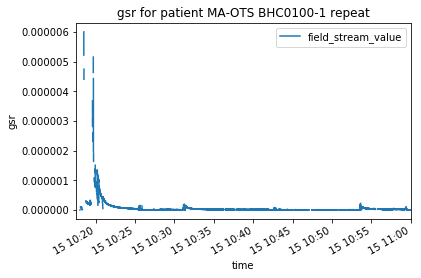

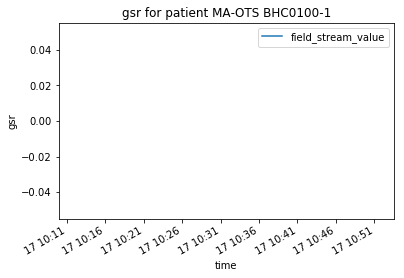

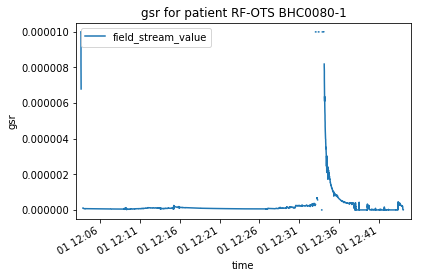

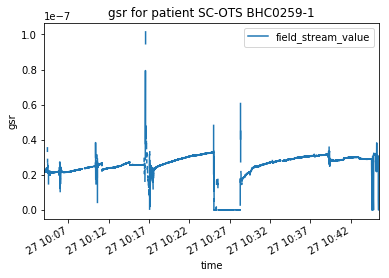

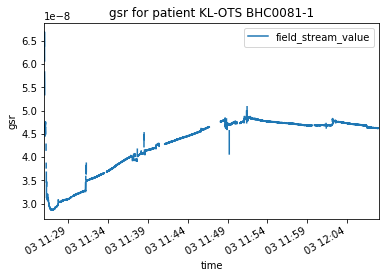

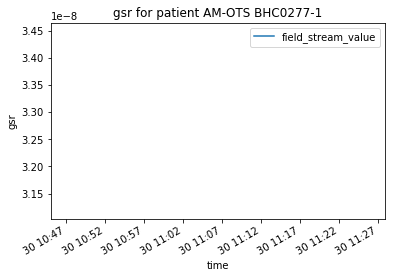

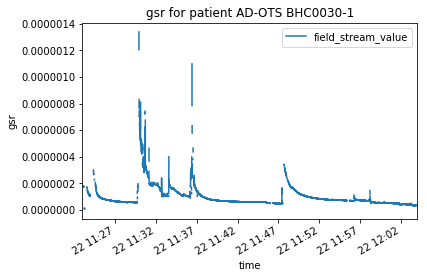

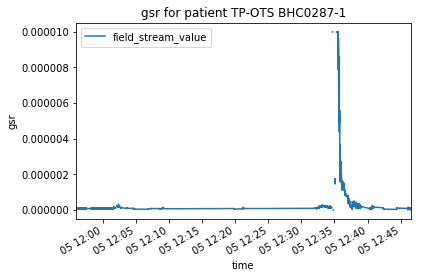

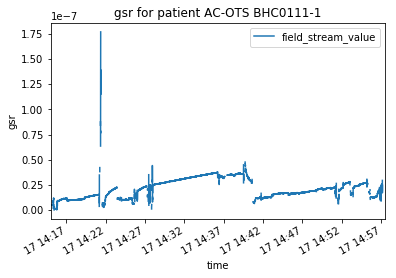

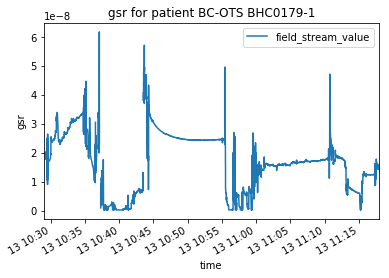

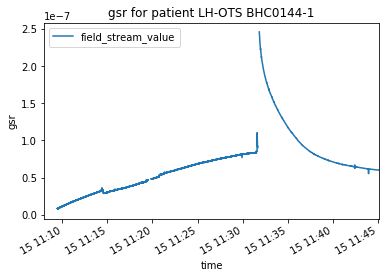

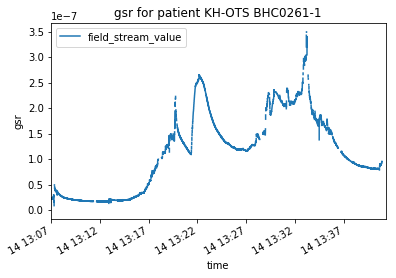

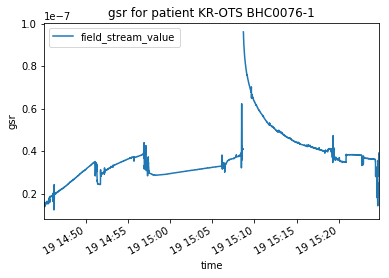

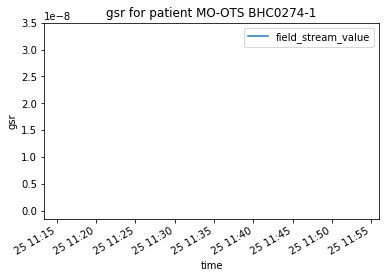

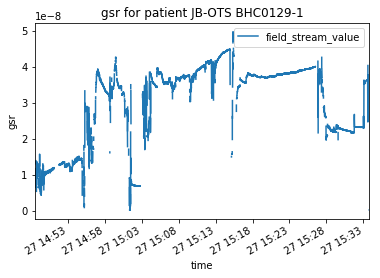

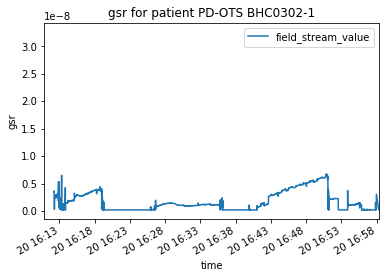

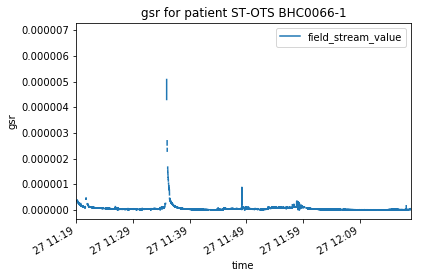

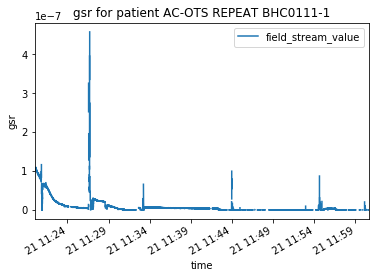

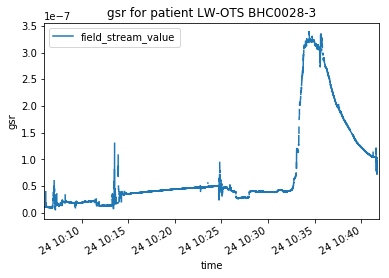

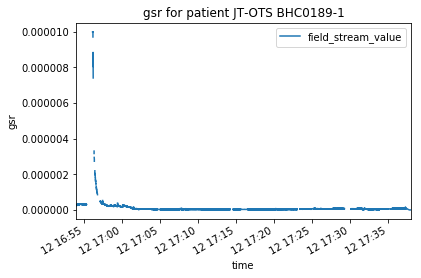

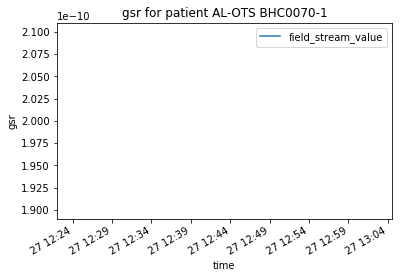

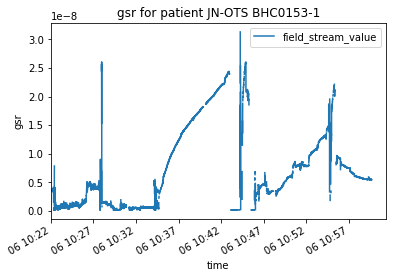

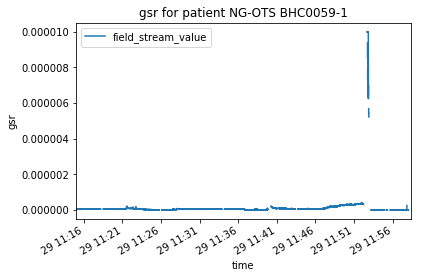

In [448]:
affect_list = list(affected.subject_id.unique())
control_list = list(control.subject_id.unique())

# try to plot gsr time series

for patient in affect_list:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==patient][['parsed_ts','field_stream','field_stream_value']]
    single_patient_gsr = single_patient[single_patient.field_stream == 'gsr']
    single_patient_gsr.reset_index(drop=True, inplace=True)
    single_patient_gsr.set_index('parsed_ts', inplace=True)
    #single_patient_gsr = single_patient_gsr.cumsum()
    single_patient_gsr.plot()
    plt.title('gsr for patient {}'.format(patient))
    plt.ylabel('gsr')
    plt.xlabel('time')

Also had an issue with the timestamps for two patients. See above. Will have to omit all data for total and half of the data for LW-OTS BHC0048-1. 

Delete these from the data set!

/Users/jeff/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


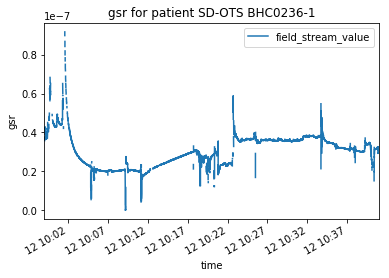

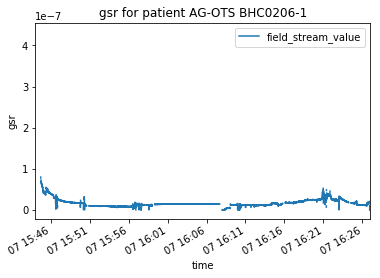

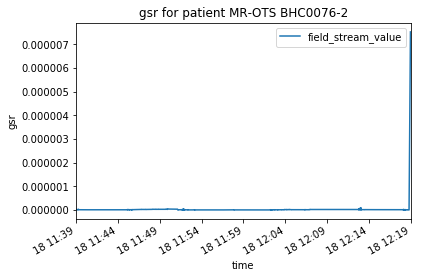

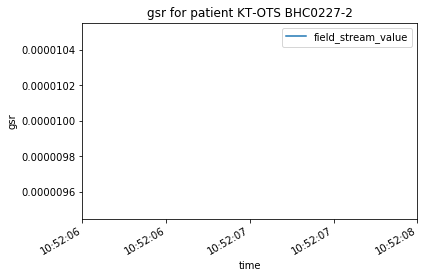

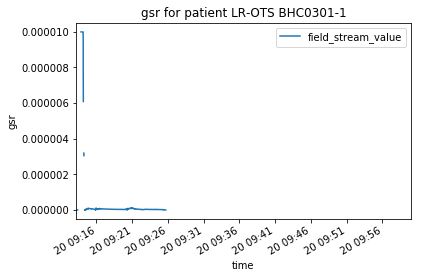

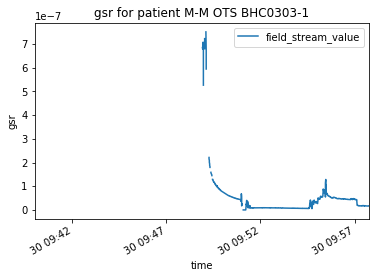

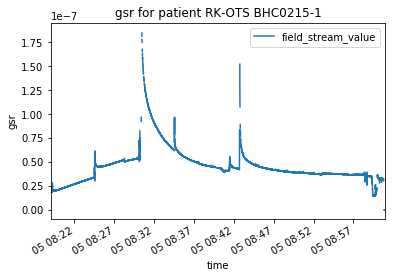

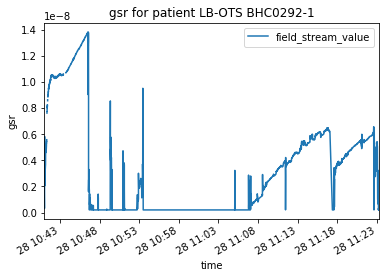

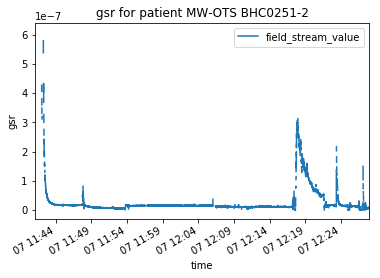

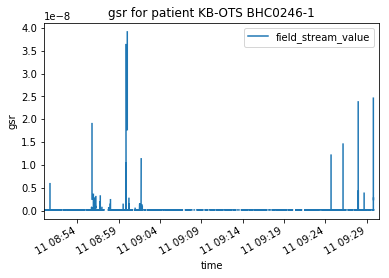

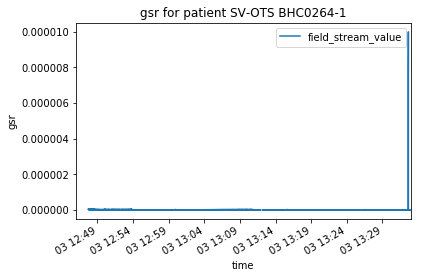

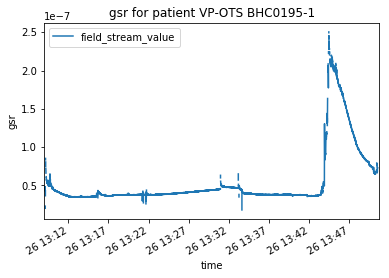

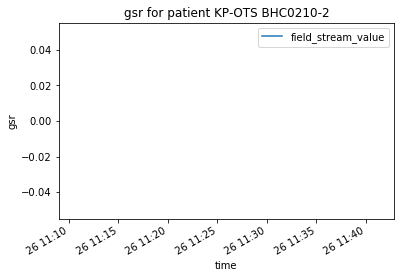

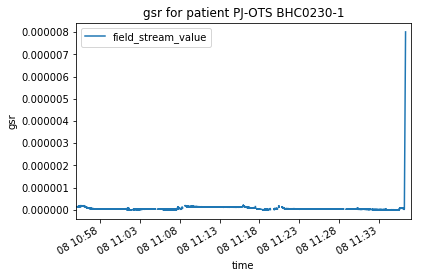

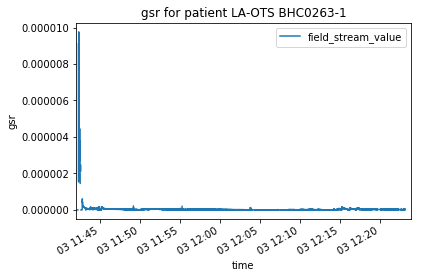

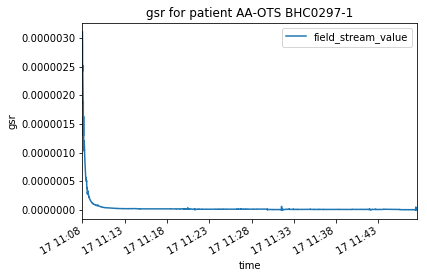

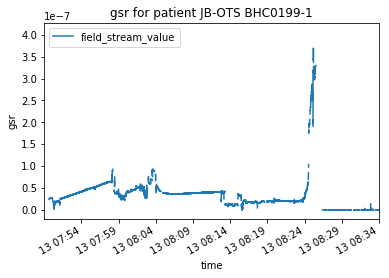

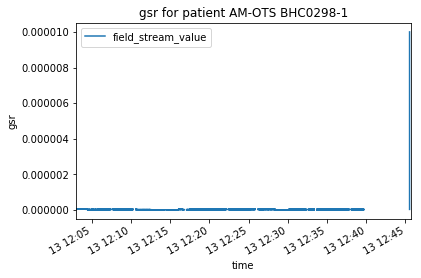

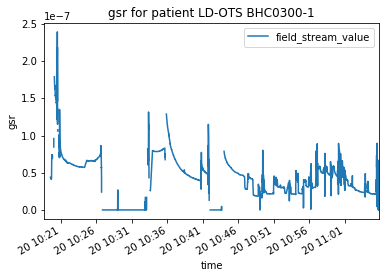

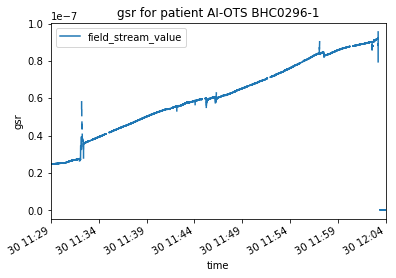

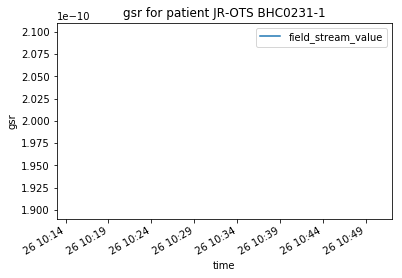

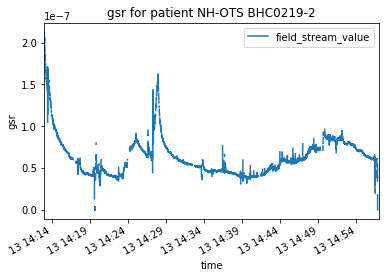

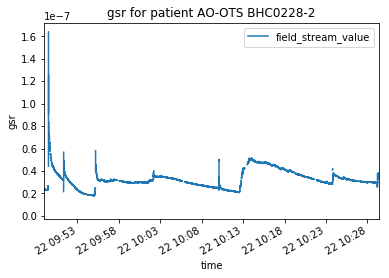

In [449]:
# try to plot gsr time series

for patient in control_list:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==patient][['parsed_ts','field_stream','field_stream_value']]
    single_patient_gsr = single_patient[single_patient.field_stream == 'gsr']
    single_patient_gsr.reset_index(drop=True, inplace=True)
    single_patient_gsr.set_index('parsed_ts', inplace=True)
    single_patient_gsr.plot()
    plt.title('gsr for patient {}'.format(patient))
    plt.ylabel('gsr')
    plt.xlabel('time')

In [436]:
filtered_all_simband_data.field_stream.unique()

array(['ecgBeatsConfidence', 'ecgBeats', 'ecgBeatsIbi', 'ppg4BeatsTDE',
       'ppg4BeatsIbi', 'heartBeat', 'ppg4BeatsInfo',
       'heartRateMonitoringConfidence', 'ppgSelection', 'ppg5', 'ppg2',
       'ppg4', 'ecg', 'ppg7', 'ppg1', 'heartRateMonitoring',
       'skinTemperature', 'ppg6', 'ppg0', 'ppg3', 'gsr', 'hrvAVHR',
       'gsrStatus', 'gsrDac0', 'gsrDac1', 'accelerometerY', 'ppg1Visual',
       'ppg6Visual', 'ppg4Visual', 'accelerometerMagnitude', 'ppg5Visual',
       'ppg3BeatsInfo', 'ppg7Visual', 'ppg3Visual', 'ecgVisual',
       'ppg0Visual', 'accelerometerZ', 'accelerometerX', 'ppg2Visual',
       'gsrGain', 'gsrModeEvent', 'gsrMode', 'age',
       'setupPulseArrivalTime', 'setupBloodPressureSystolic',
       'setupBloodPressureDiastolicCuffCal', 'height',
       'setupBloodPressureSystolicCuffCal', 'setupBloodPressureDiastolic',
       'setupHeartRate', 'weight', 'gsrCollection',
       'skinTemperatureCollection', 'heartRateModeSelected', 'hrvLF',
       'ppg4LevelDC', '

/Users/jeff/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


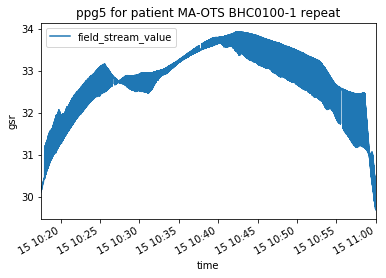

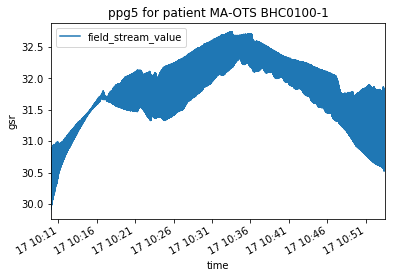

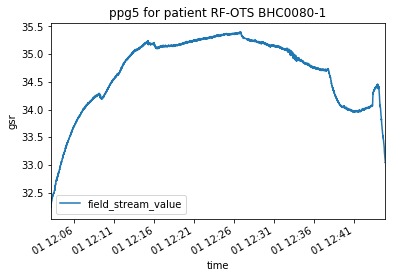

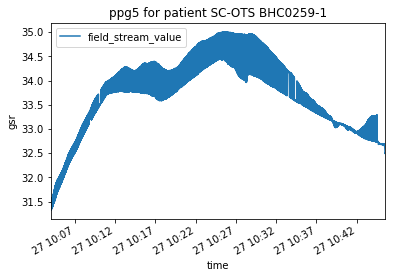

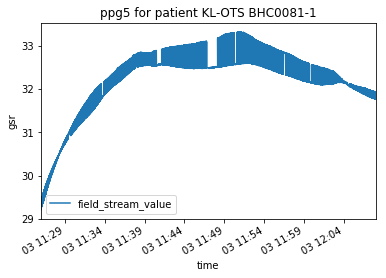

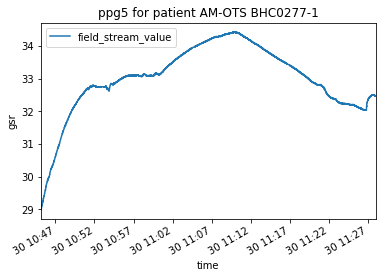

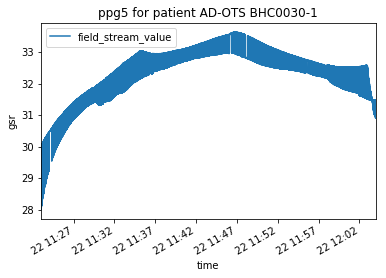

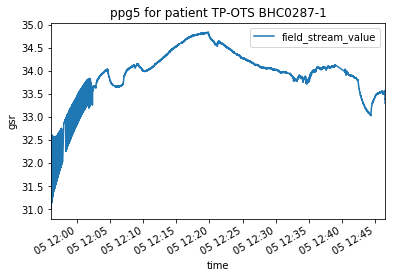

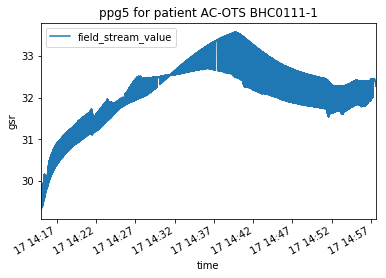

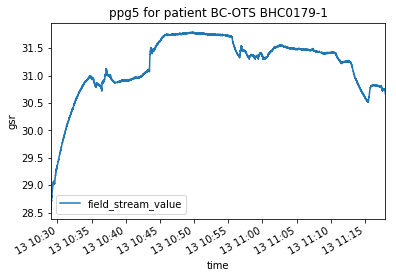

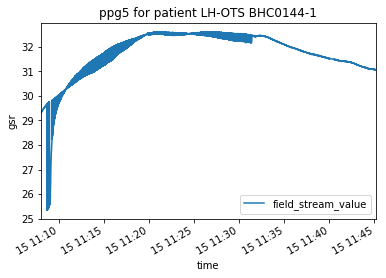

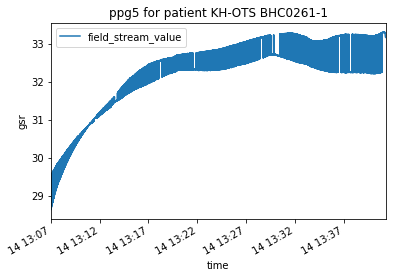

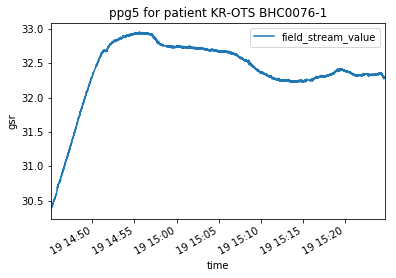

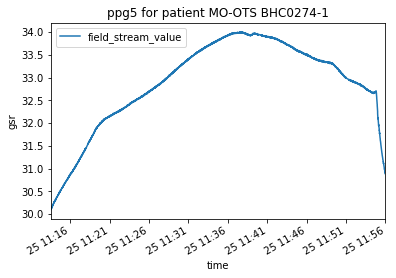

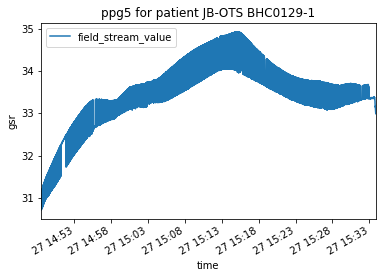

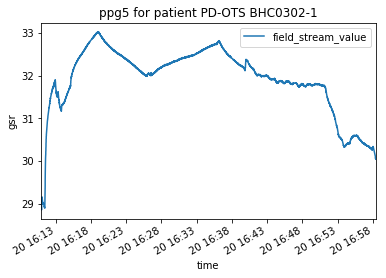

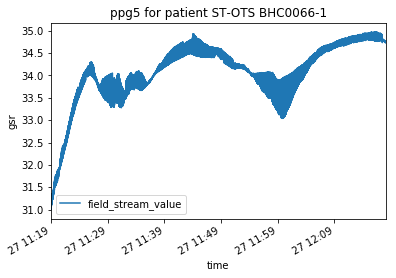

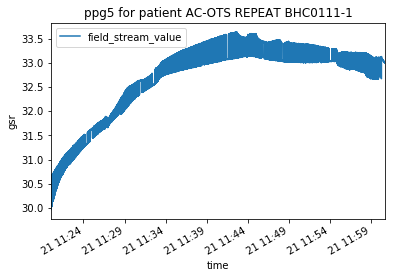

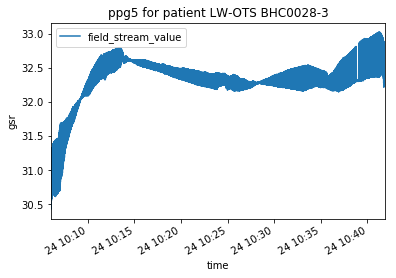

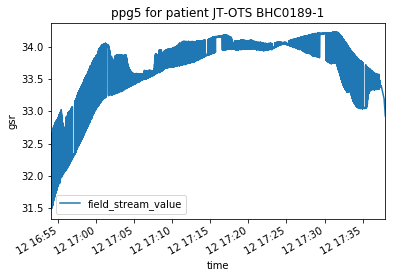

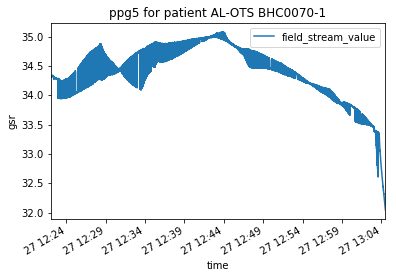

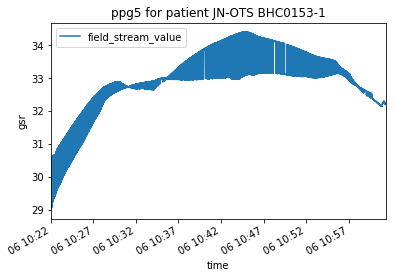

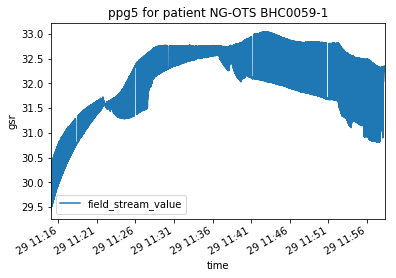

In [439]:
for patient in affect_list:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==patient][['parsed_ts','field_stream','field_stream_value']]
    single_patient_gsr = single_patient[single_patient.field_stream == 'skinTemperature']
    single_patient_gsr.reset_index(drop=True, inplace=True)
    single_patient_gsr.set_index('parsed_ts', inplace=True)
    #single_patient_gsr = single_patient_gsr.cumsum()
    single_patient_gsr.plot()
    plt.title('ppg5 for patient {}'.format(patient))
    plt.ylabel('gsr')
    plt.xlabel('time')

/Users/jeff/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


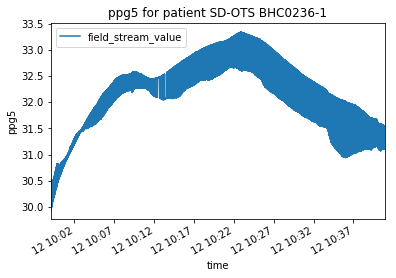

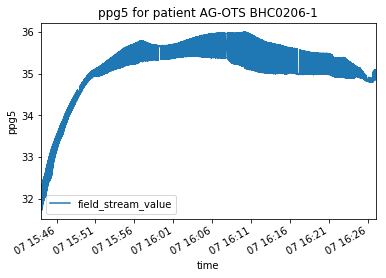

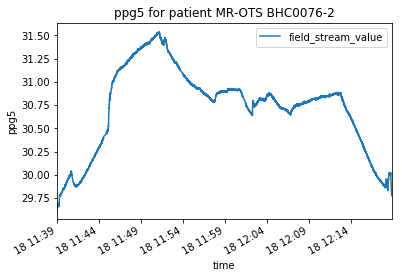

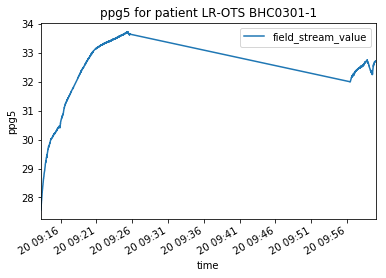

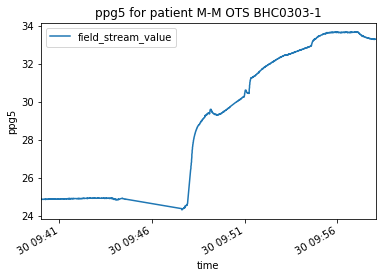

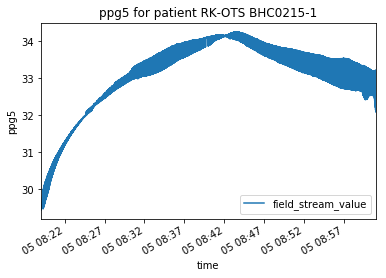

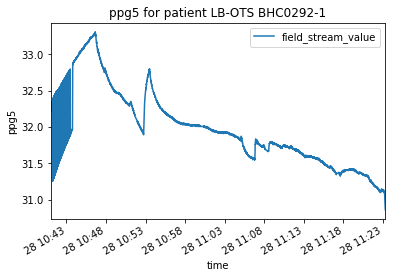

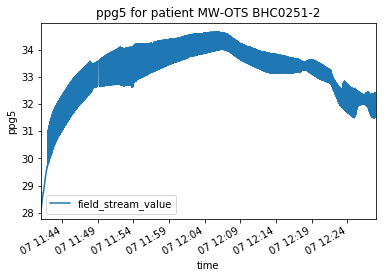

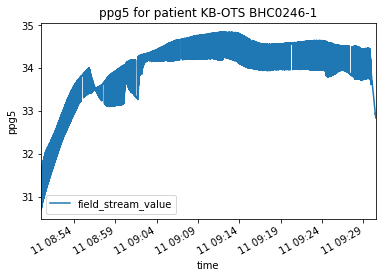

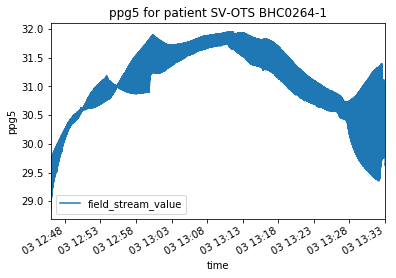

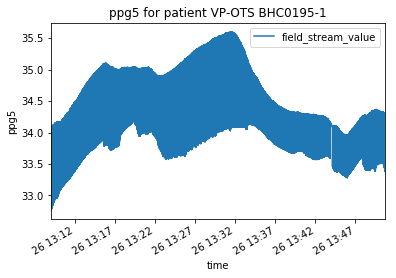

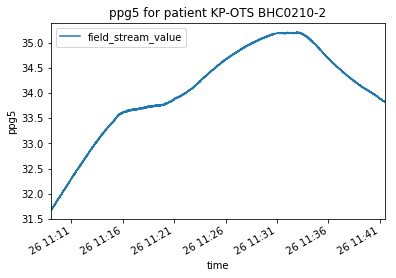

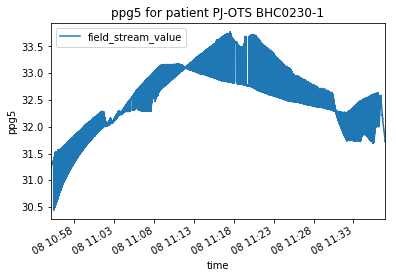

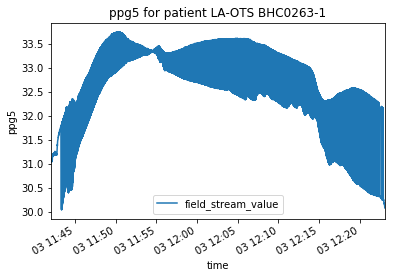

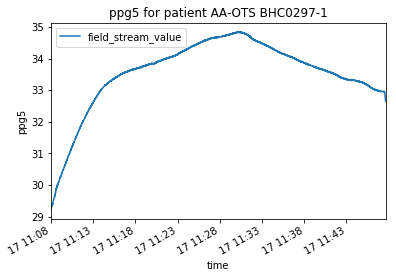

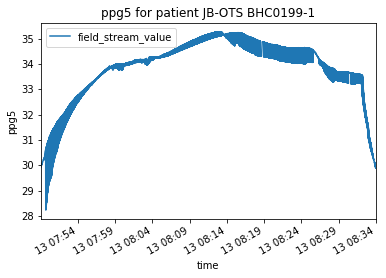

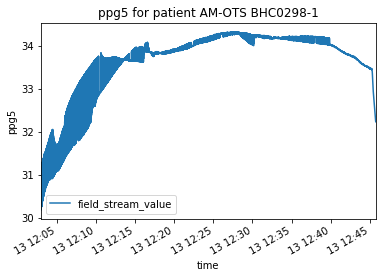

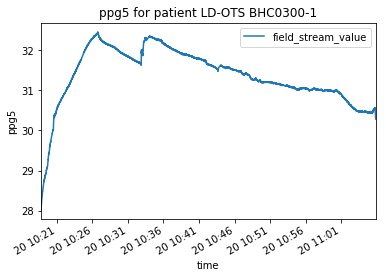

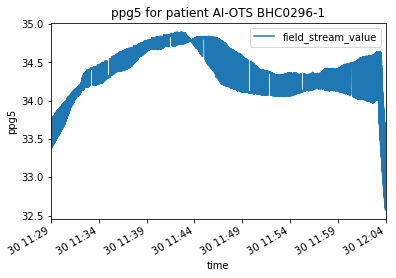

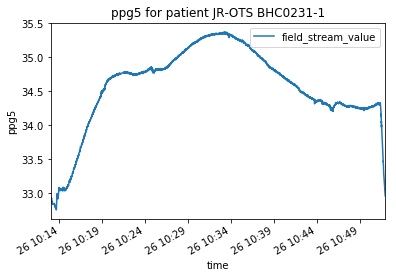

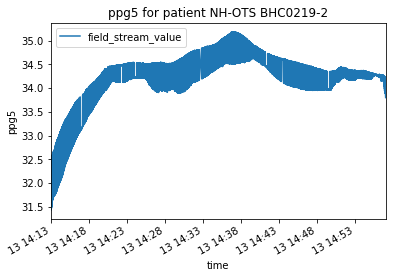

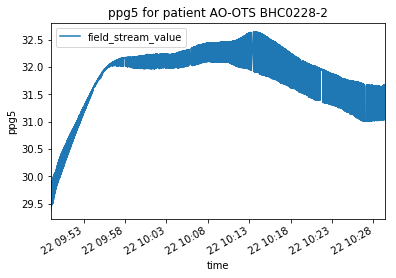

In [447]:
for patient in control_list:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==patient][['parsed_ts','field_stream','field_stream_value']]
    single_patient_gsr = single_patient[single_patient.field_stream == 'skinTemperature']
    single_patient_gsr.reset_index(drop=True, inplace=True)
    single_patient_gsr.set_index('parsed_ts', inplace=True)
    #single_patient_gsr = single_patient_gsr.cumsum()
    single_patient_gsr.plot()
    plt.title('ppg5 for patient {}'.format(patient))
    plt.ylabel('ppg5')
    plt.xlabel('time')

In [ ]:
for patient in control_list:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==patient][['parsed_ts','field_stream','field_stream_value']]
    single_patient_gsr = single_patient[single_patient.field_stream == 'skinTemperature']
    single_patient_gsr.reset_index(drop=True, inplace=True)
    single_patient_gsr.set_index('parsed_ts', inplace=True)
    #single_patient_gsr = single_patient_gsr.cumsum()
    single_patient_gsr.plot()
    plt.title('ppg5 for patient {}'.format(patient))
    plt.ylabel('ppg5')
    plt.xlabel('time')

In [451]:
single_patient.index

Int64Index([6829967, 6829968, 6829969, 6829970, 6829971, 6829972, 6829973,
            6829974, 6829975, 6829976,
            ...
            7014531, 7014532, 7014533, 7014534, 7014535, 7014536, 7014537,
            7014538, 7014539, 7014540],
           dtype='int64', length=184574)

In [556]:
affect_list

['MA-OTS BHC0100-1 repeat',
 'MA-OTS BHC0100-1',
 'RF-OTS BHC0080-1',
 'SC-OTS BHC0259-1',
 'KL-OTS BHC0081-1',
 'AM-OTS BHC0277-1',
 'AD-OTS BHC0030-1',
 'TP-OTS BHC0287-1',
 'AC-OTS BHC0111-1',
 'BC-OTS BHC0179-1',
 'LH-OTS BHC0144-1',
 'KH-OTS BHC0261-1',
 'KR-OTS BHC0076-1',
 'MO-OTS BHC0274-1',
 'JB-OTS BHC0129-1',
 'PD-OTS BHC0302-1',
 'ST-OTS BHC0066-1',
 'AC-OTS REPEAT BHC0111-1',
 'LW-OTS BHC0028-3',
 'JT-OTS BHC0189-1',
 'AL-OTS BHC0070-1',
 'JN-OTS BHC0153-1',
 'NG-OTS BHC0059-1']

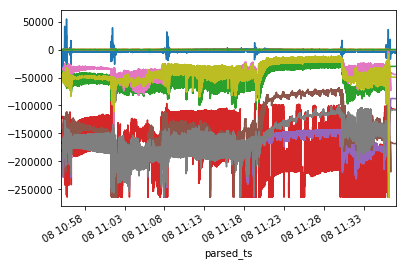

In [551]:
for field in important_field_streams:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id=='PJ-OTS BHC0230-1']
    single_patient_field = single_patient[single_patient.field_stream == field]
    single_patient_field.set_index('parsed_ts', inplace=True)
    single_patient_field.field_stream_value.plot()

In [570]:
short_affected_subjects = affected_subjects[0:15]

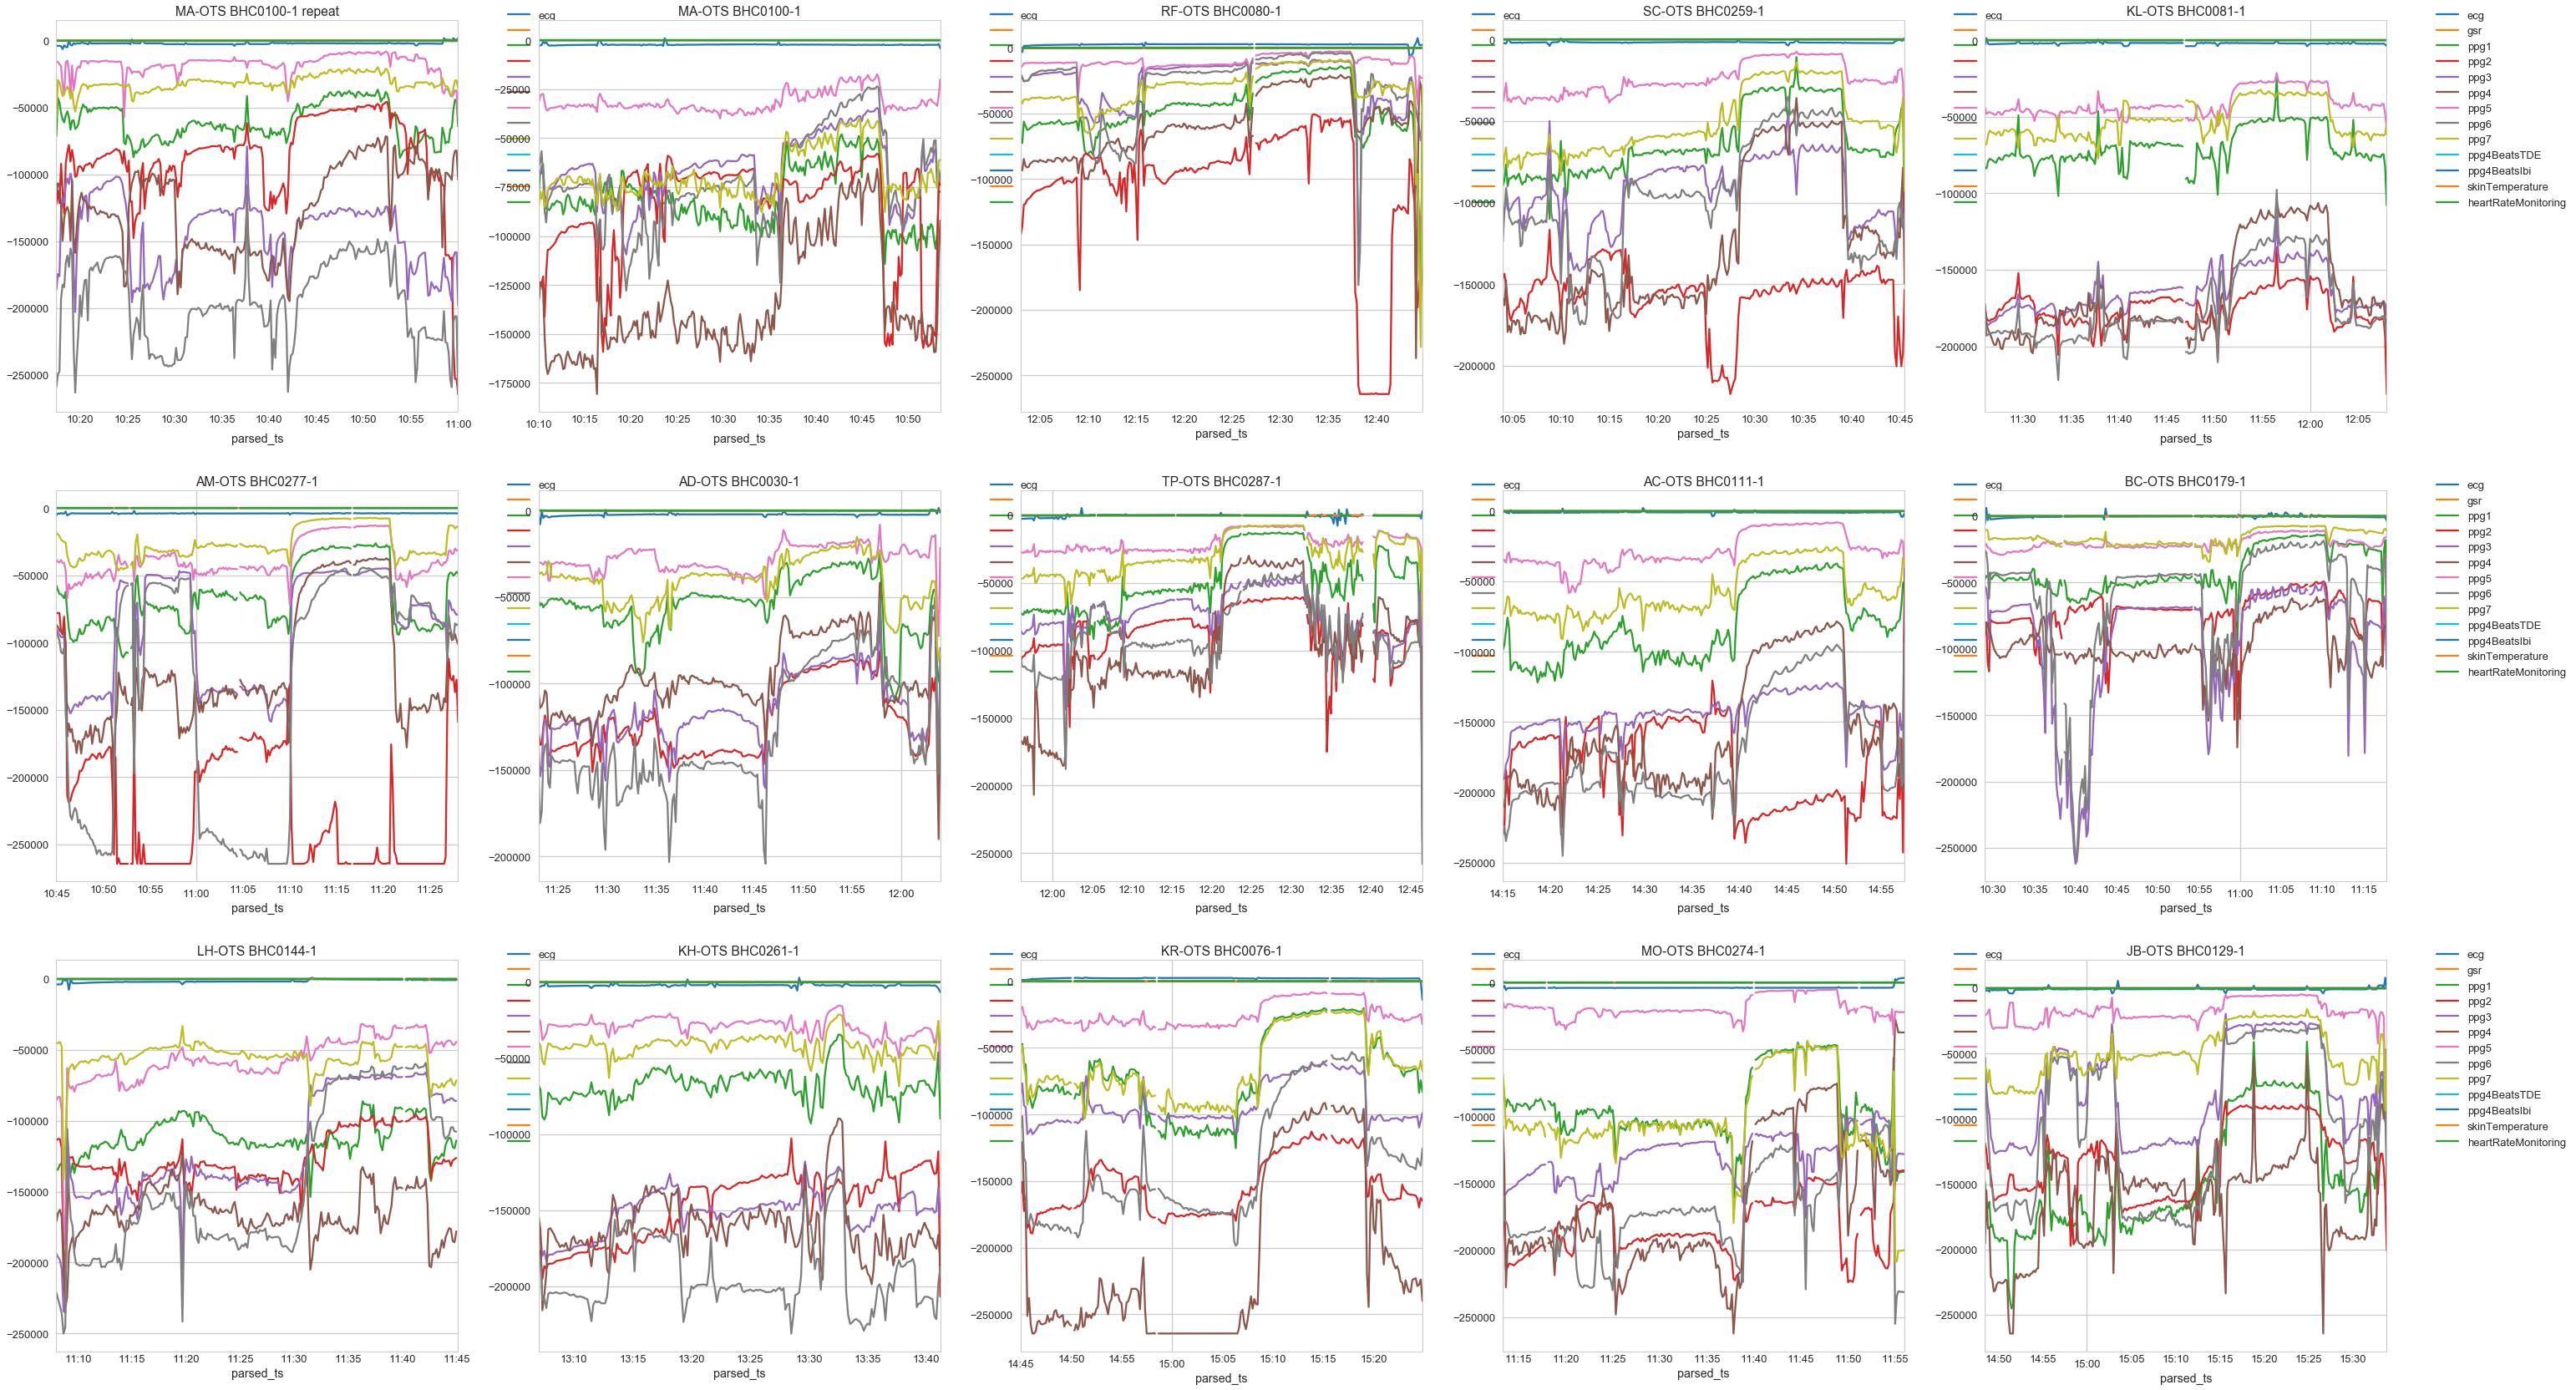

In [571]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for subject in short_affected_subjects:
    fig.add_subplot(5, 5, sub_plot_num)
    for field in important_field_streams:
        single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==subject]
        single_patient_field = single_patient[single_patient.field_stream == field]
        collapsed = collapse_timeseries(single_patient_field, '10S')
        collapsed.set_index('parsed_ts', inplace=True)
        collapsed.field_stream_value.plot(label='{}'.format(field), title='{}'.format(subject))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

In [ ]:
#plots multiple streams seperately for a given subject
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for field in important_field_streams:
    fig.add_subplot(5, 5, sub_plot_num)
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id=='PJ-OTS BHC0230-1']
    single_patient_field = single_patient[single_patient.field_stream == field]
    collapsed = collapse_timeseries(single_patient_field, '10S')
    collapsed.set_index('parsed_ts', inplace=True)
    collapsed.field_stream_value.plot(label='{}'.format(field))
    plt.xlabel('{}'.format(field))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

In [578]:
short_control_subjects = control_subjects[0:15]

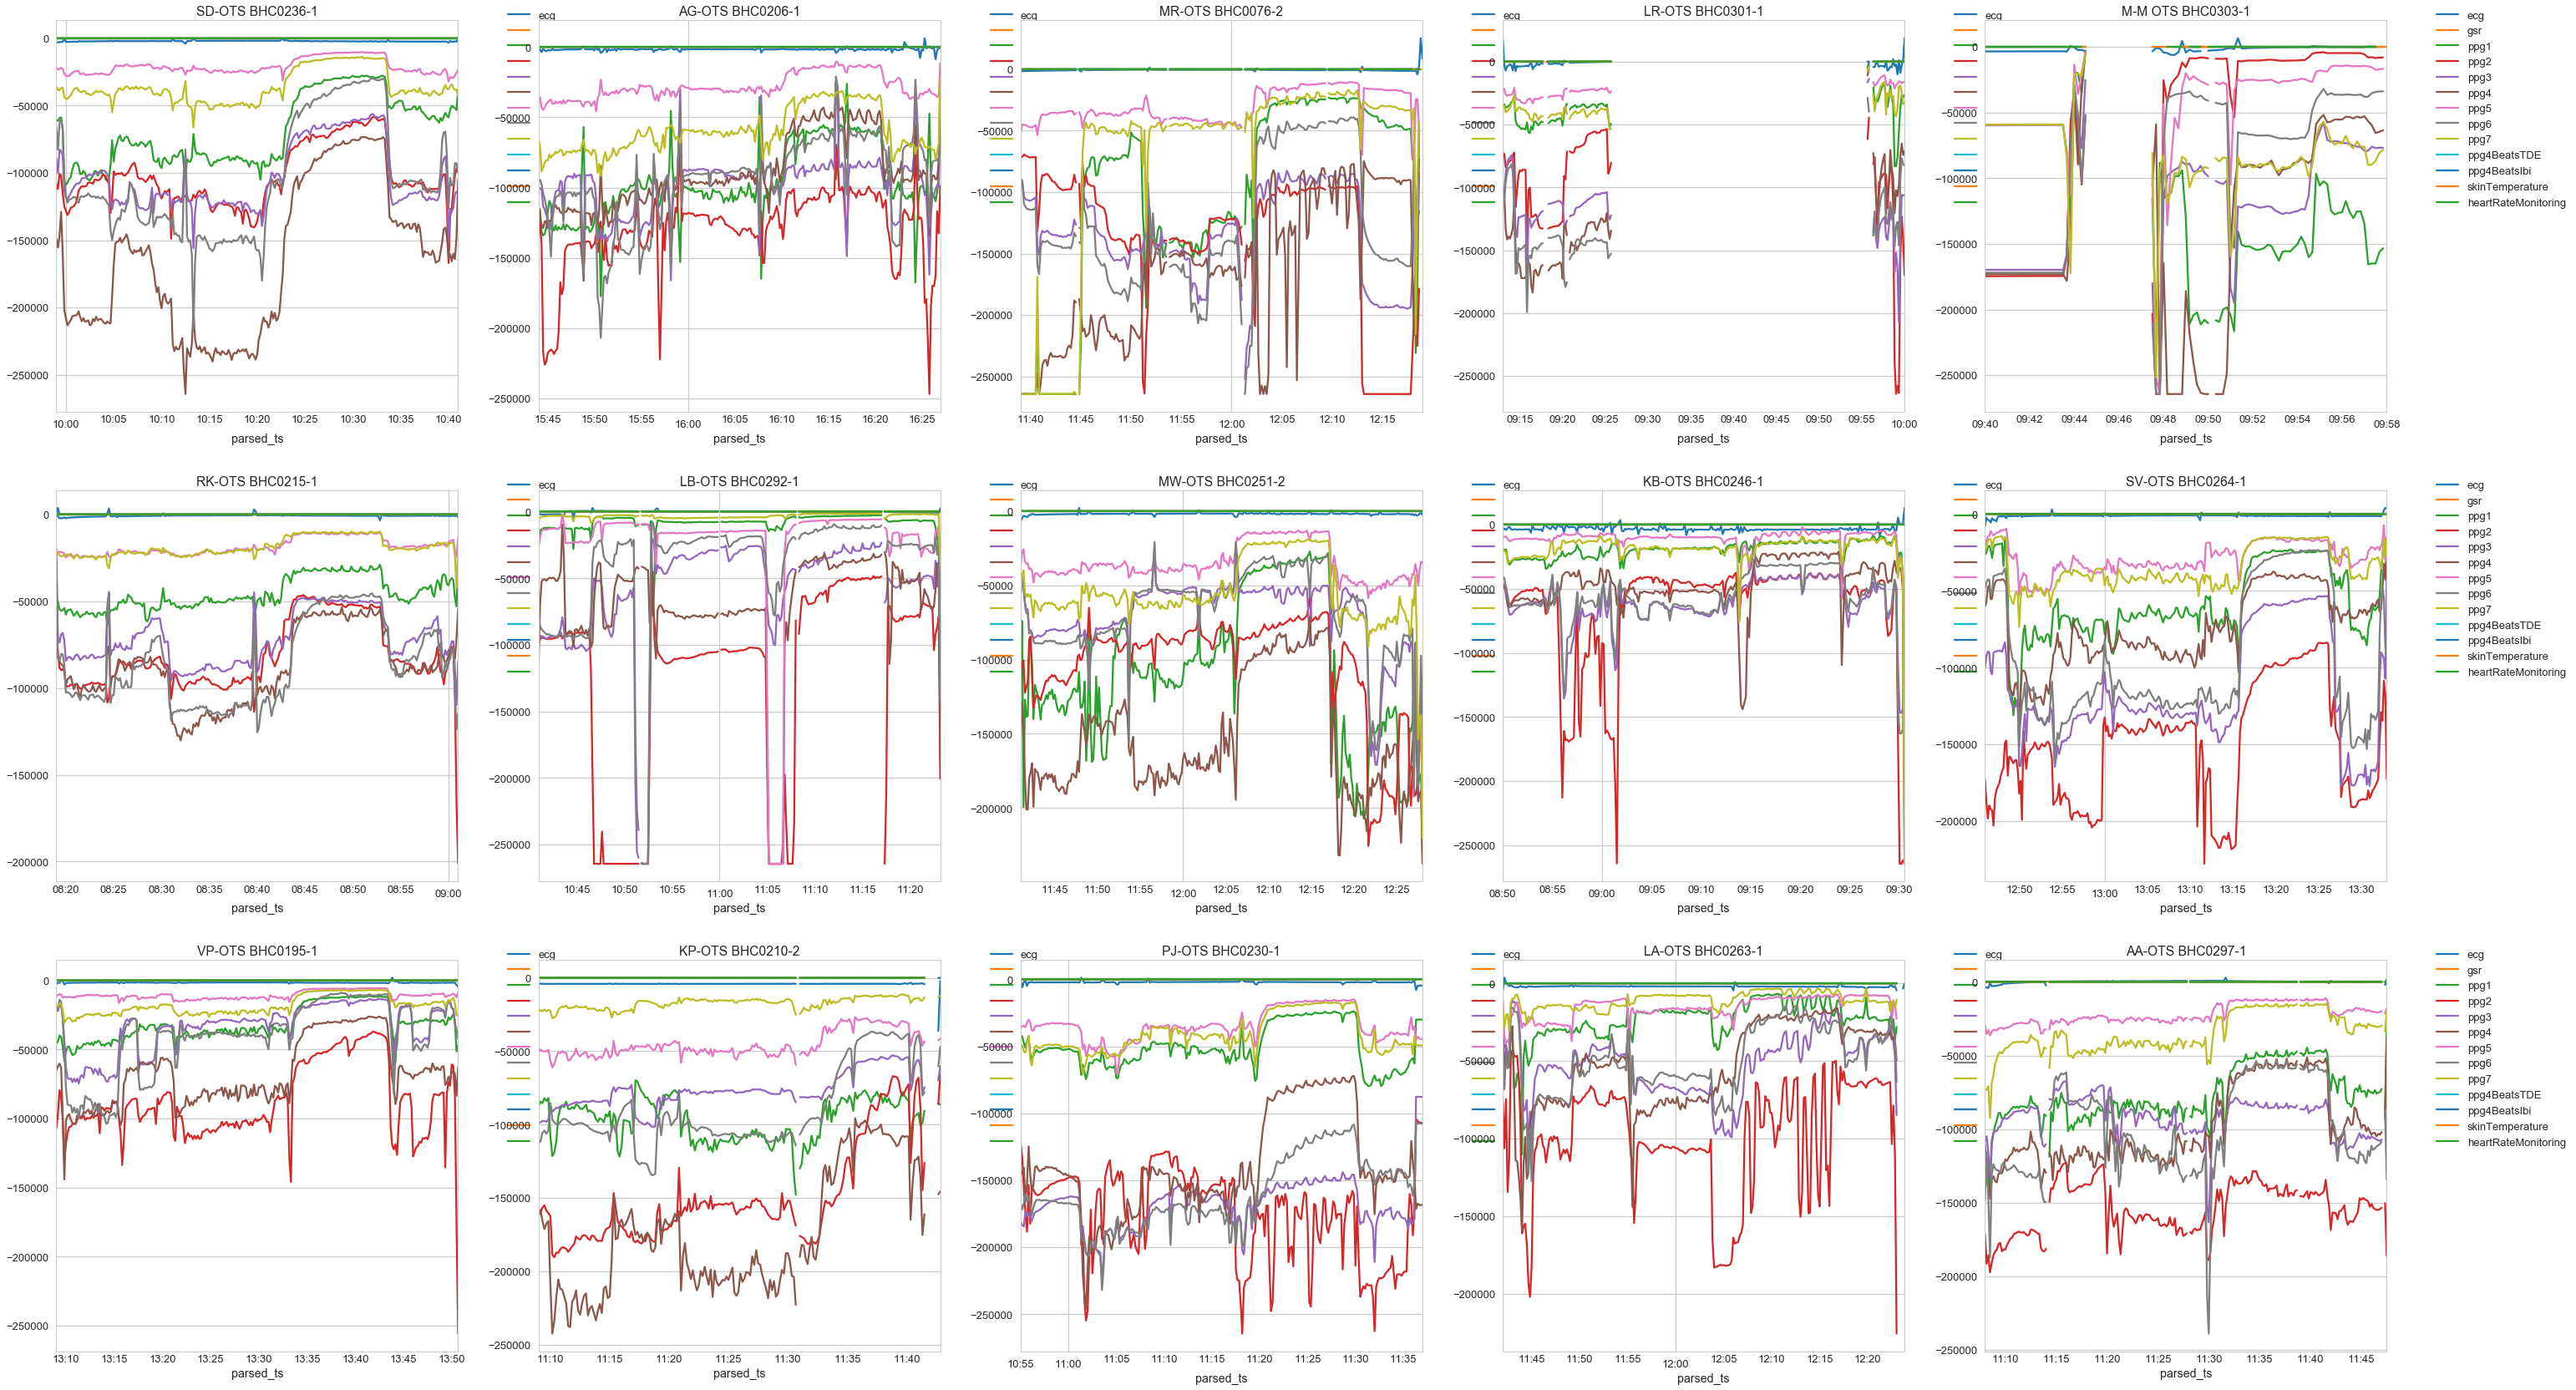

In [580]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for subject in short_control_subjects:
    fig.add_subplot(5, 5, sub_plot_num)
    for field in important_field_streams:
        single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==subject]
        single_patient_field = single_patient[single_patient.field_stream == field]
        collapsed = collapse_timeseries(single_patient_field, '10S')
        collapsed.set_index('parsed_ts', inplace=True)
        collapsed.field_stream_value.plot(label='{}'.format(field), title='{}'.format(subject))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

In [ ]:
for field in important_field_streams:
    single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id=='PJ-OTS BHC0230-1']
    single_patient_field = single_patient[single_patient.field_stream == field]
    collapsed = collapse_timeseries(single_patient_field, '10S')
    collapsed.set_index('parsed_ts', inplace=True)
    collapsed.field_stream_value.plot()

In [609]:
short_fields = ['gsr']

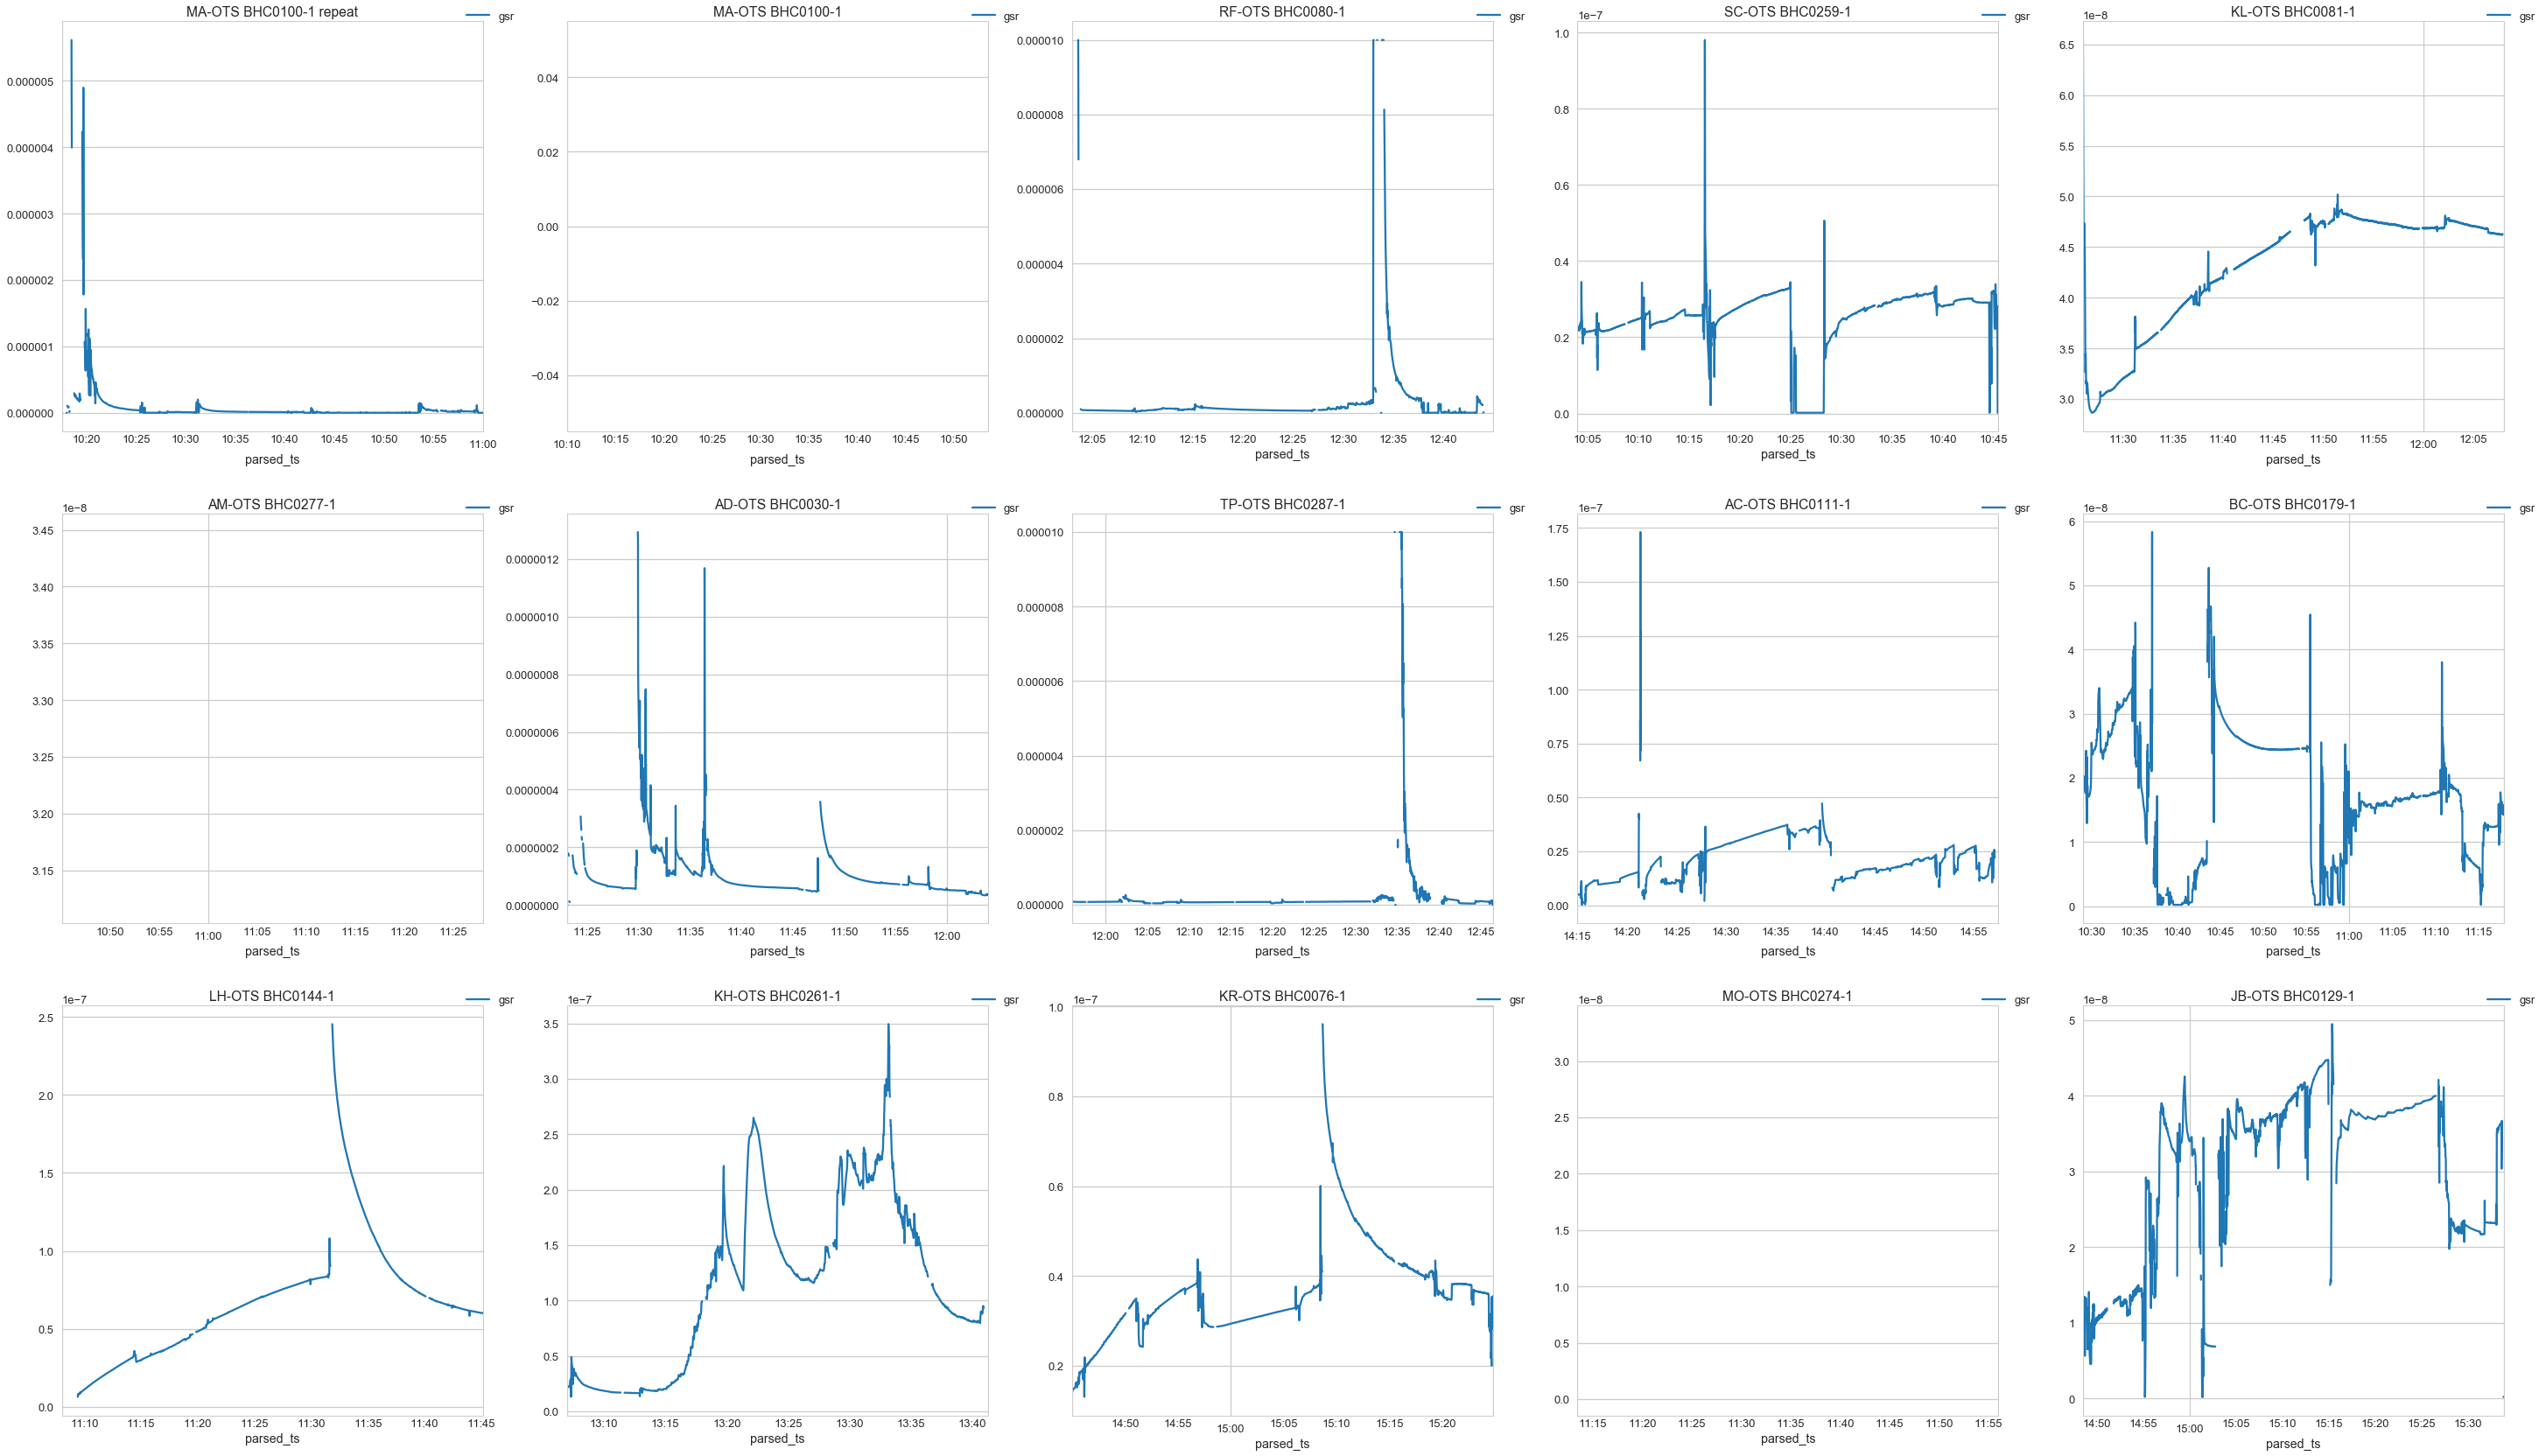

In [610]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for subject in short_affected_subjects:
    fig.add_subplot(5, 5, sub_plot_num)
    for field in short_fields:
        single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==subject]
        single_patient_field = single_patient[single_patient.field_stream == field]
        collapsed = collapse_timeseries(single_patient_field, '1S')
        collapsed.set_index('parsed_ts', inplace=True)
        collapsed.field_stream_value.plot(label='{}'.format(field), title='{}'.format(subject))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

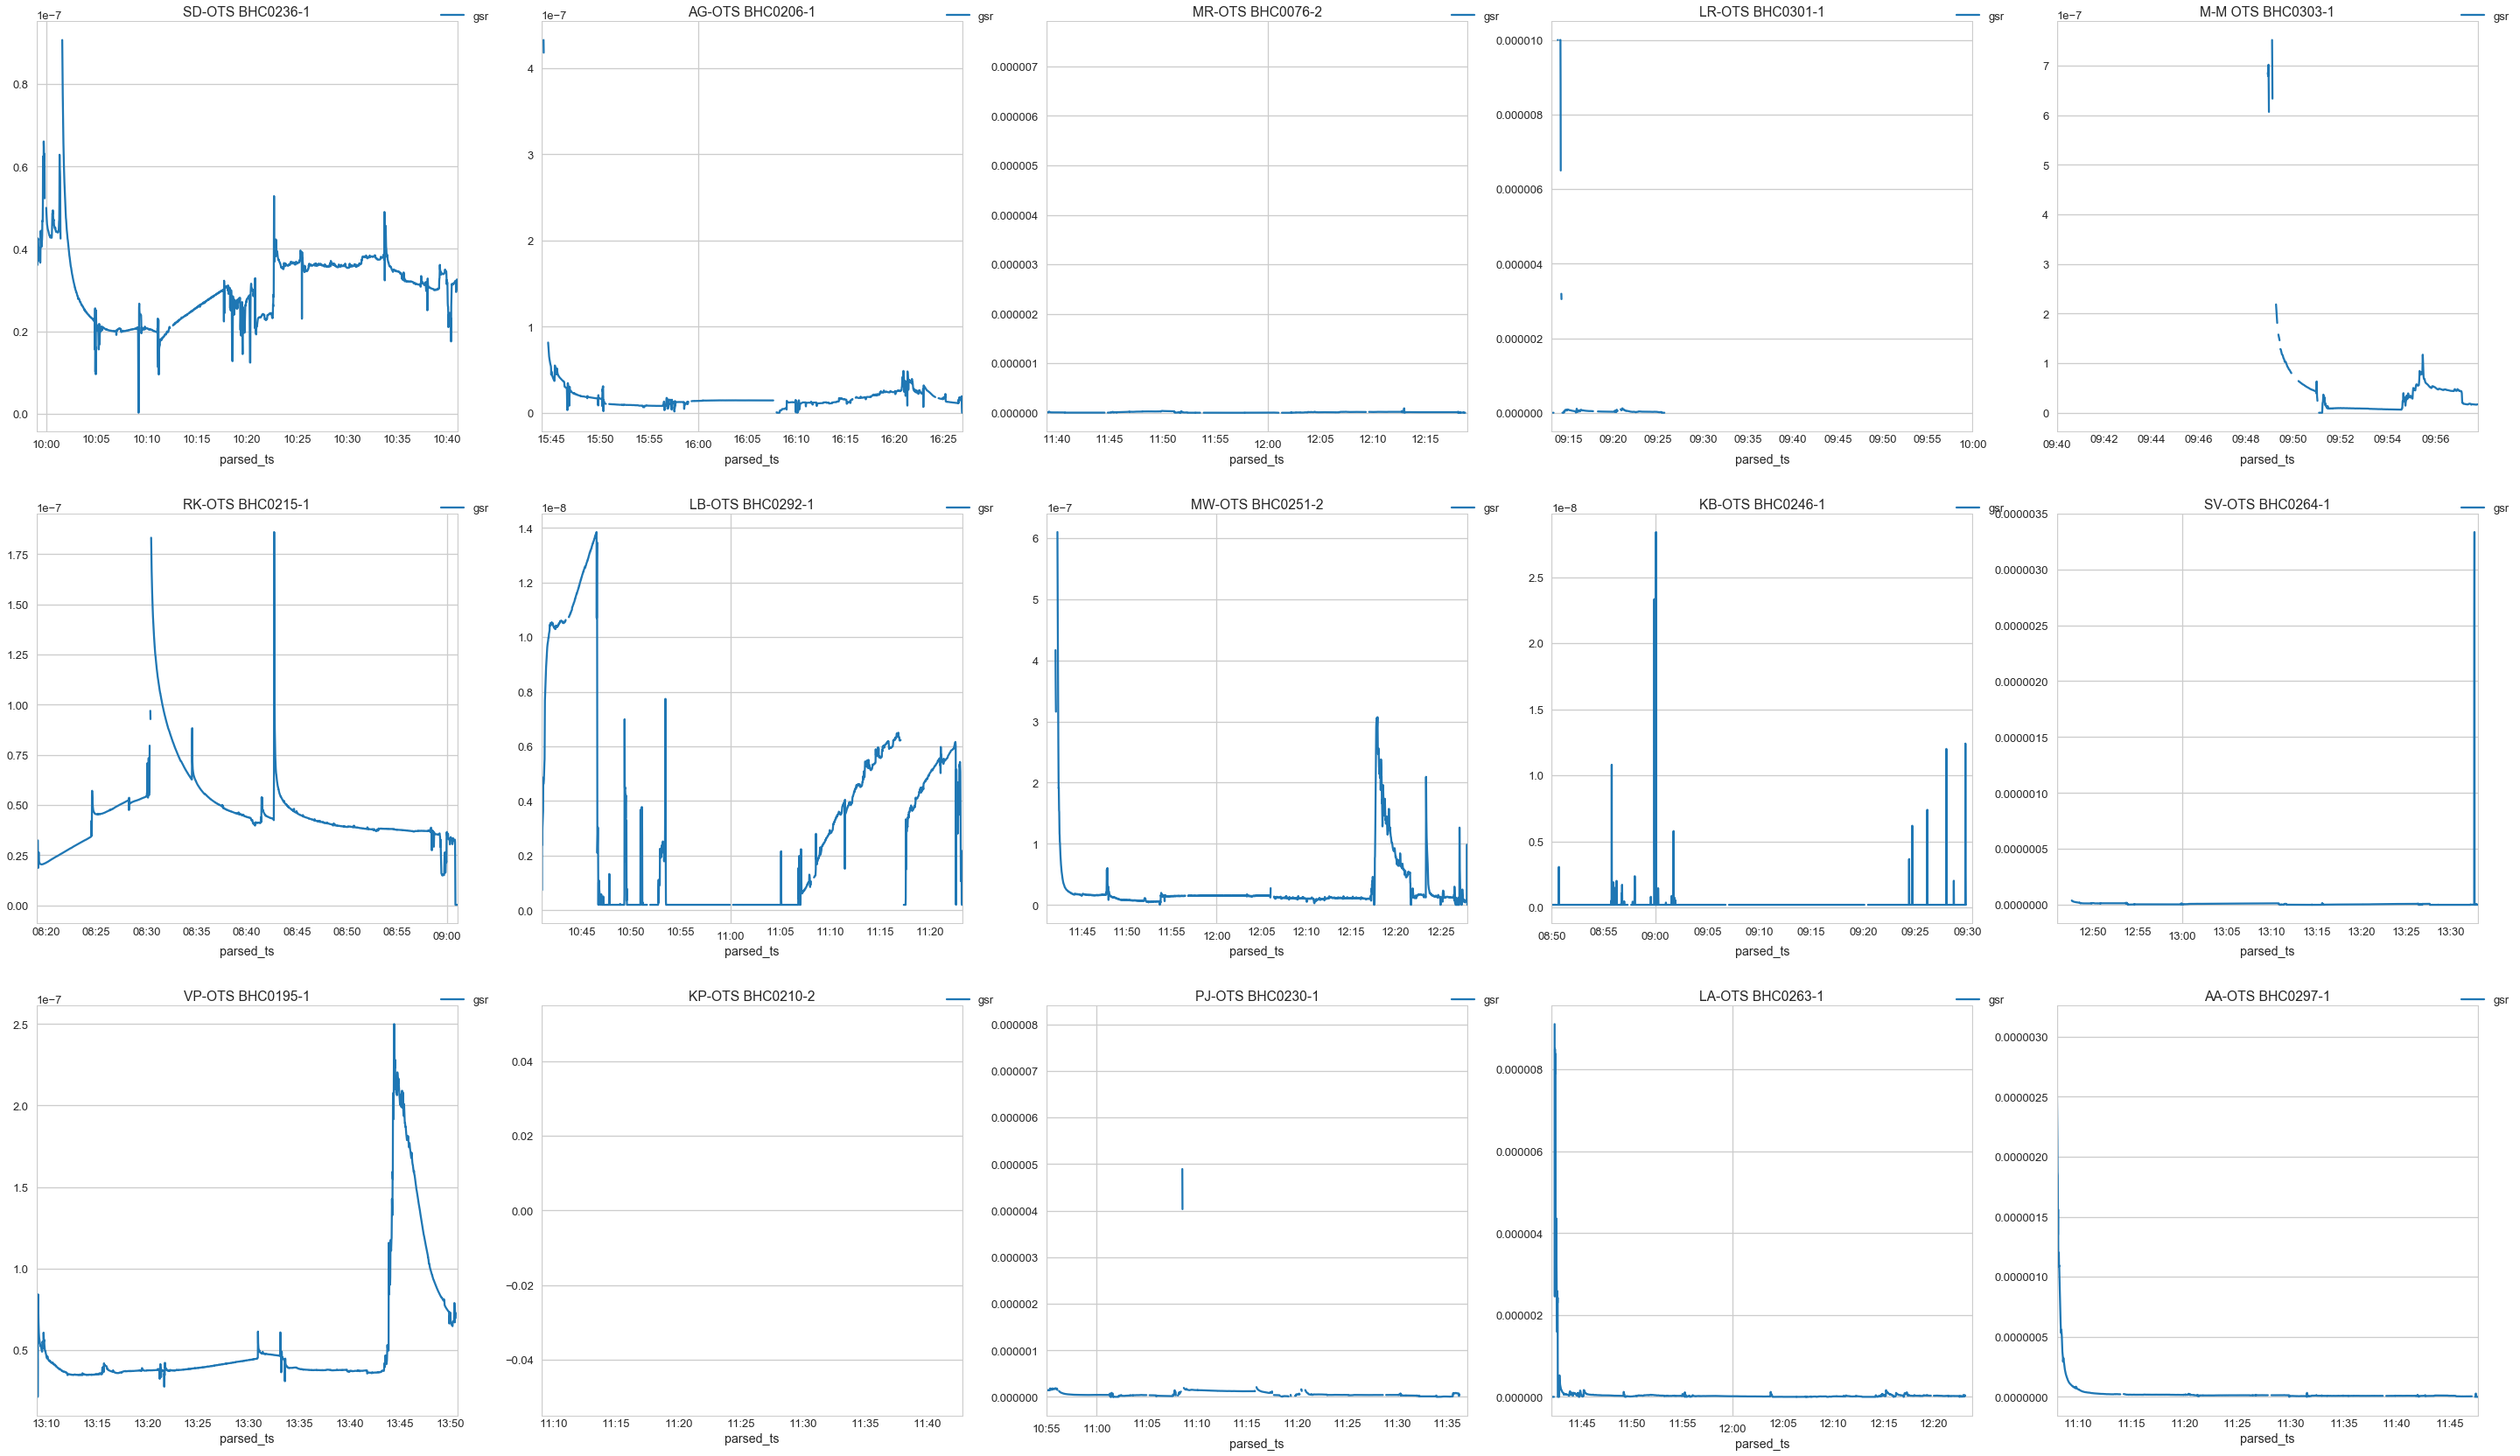

In [611]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for subject in short_control_subjects:
    fig.add_subplot(5, 5, sub_plot_num)
    for field in short_fields:
        single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==subject]
        single_patient_field = single_patient[single_patient.field_stream == field]
        collapsed = collapse_timeseries(single_patient_field, '1S')
        collapsed.set_index('parsed_ts', inplace=True)
        collapsed.field_stream_value.plot(label='{}'.format(field), title='{}'.format(subject))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

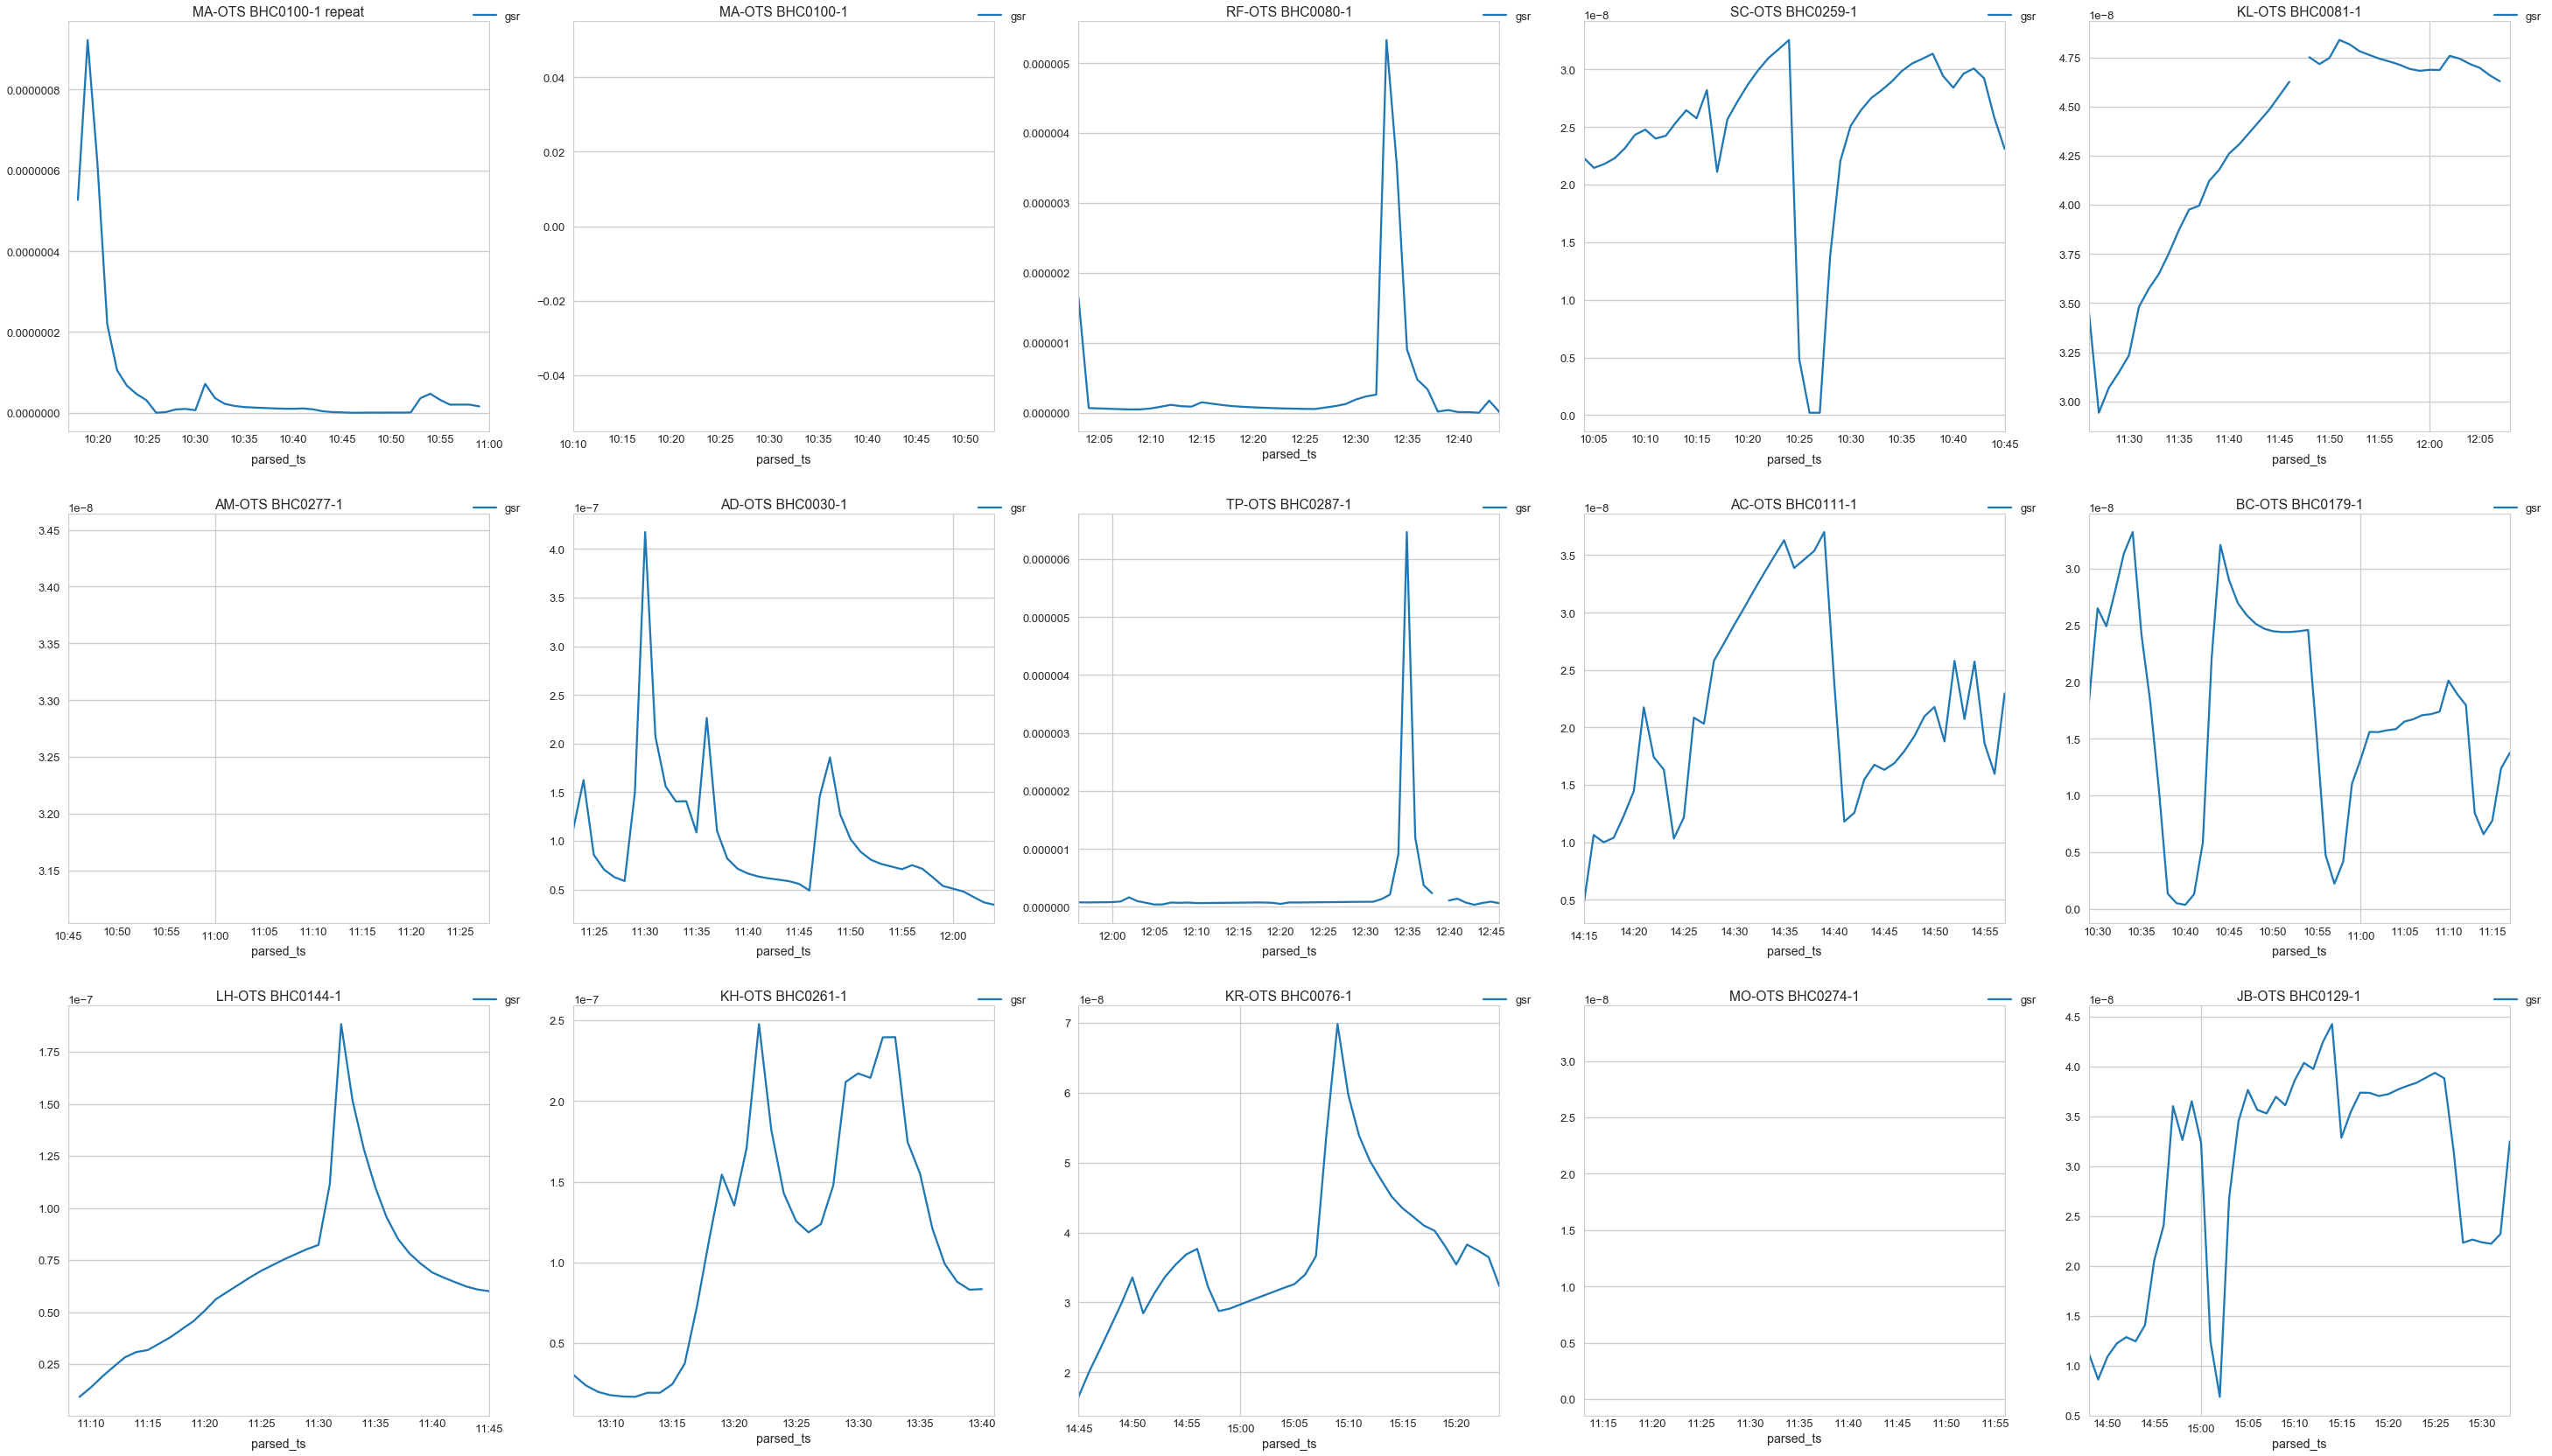

In [605]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for subject in short_affected_subjects:
    fig.add_subplot(5, 5, sub_plot_num)
    for field in short_fields:
        single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==subject]
        single_patient_field = single_patient[single_patient.field_stream == field]
        collapsed = collapse_timeseries(single_patient_field, '60S')
        collapsed.set_index('parsed_ts', inplace=True)
        collapsed.field_stream_value.plot(label='{}'.format(field), title='{}'.format(subject))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

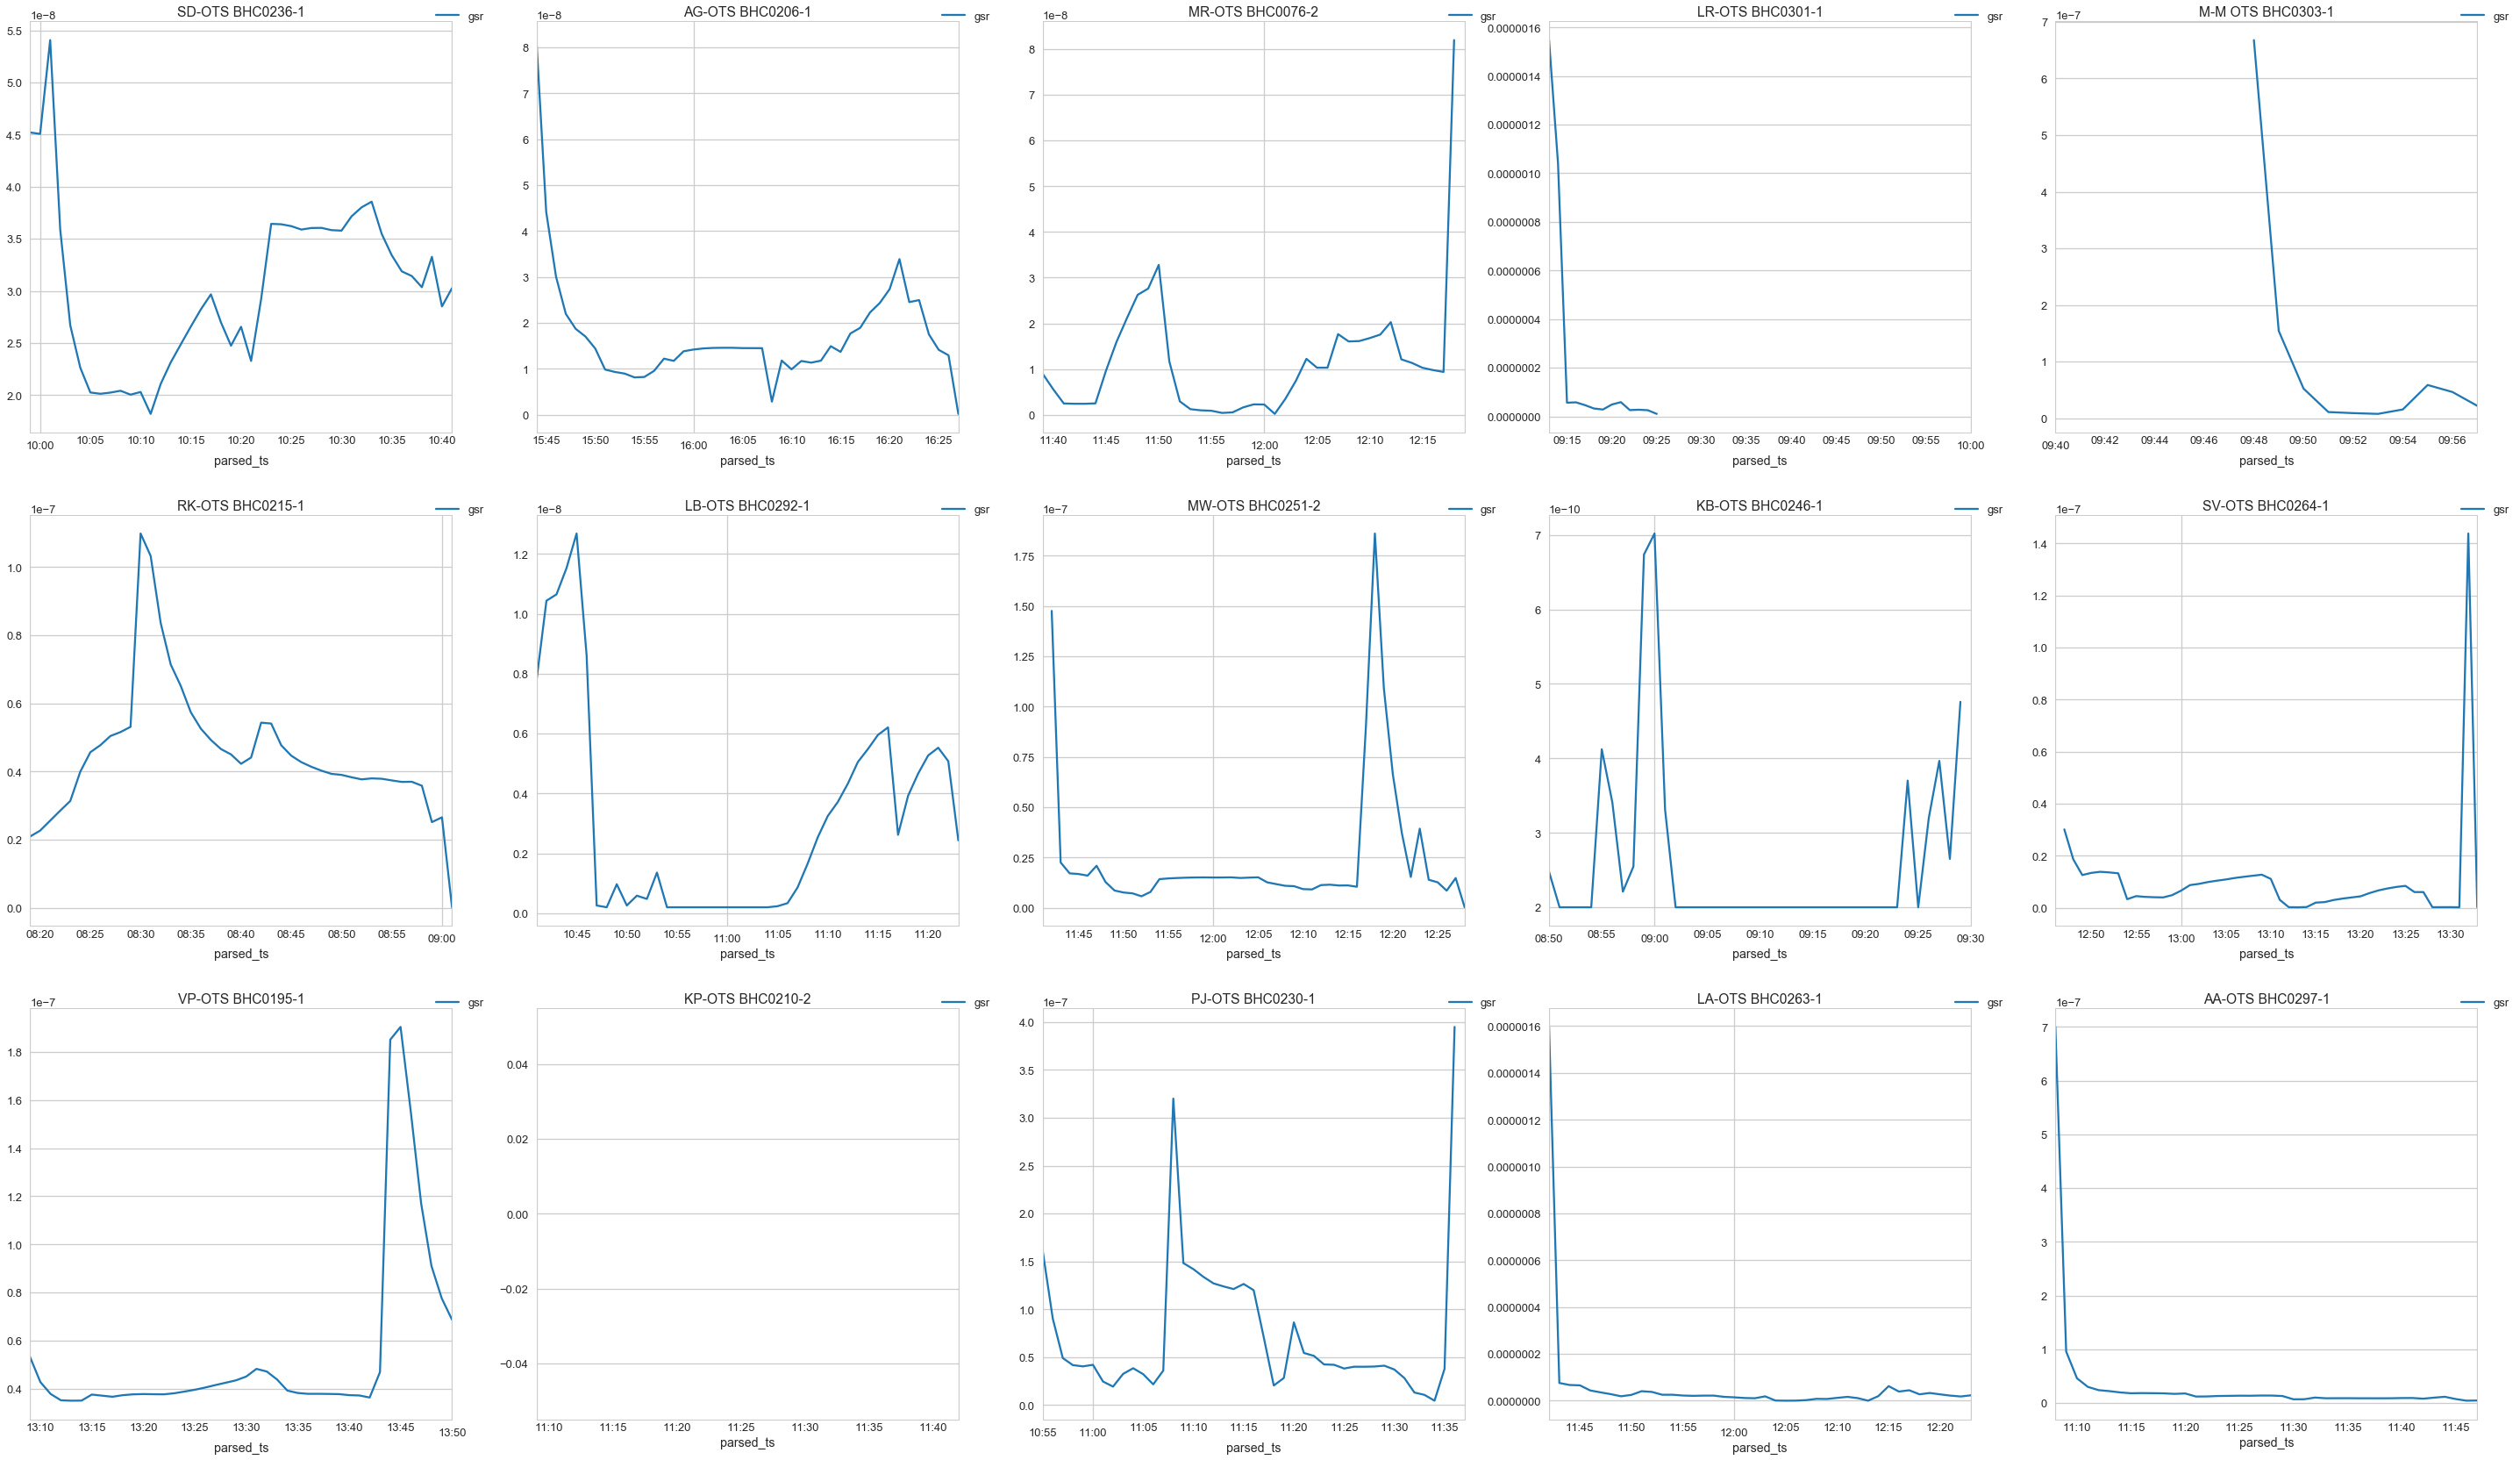

In [604]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for subject in short_control_subjects:
    fig.add_subplot(5, 5, sub_plot_num)
    for field in short_fields:
        single_patient = filtered_all_simband_data[filtered_all_simband_data.subject_id==subject]
        single_patient_field = single_patient[single_patient.field_stream == field]
        collapsed = collapse_timeseries(single_patient_field, '60S')
        collapsed.set_index('parsed_ts', inplace=True)
        collapsed.field_stream_value.plot(label='{}'.format(field), title='{}'.format(subject))
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    sub_plot_num +=1

In [612]:
filtered_all_simband_data.field_stream.unique()

array(['ecgBeatsConfidence', 'ecgBeats', 'ecgBeatsIbi', 'ppg4BeatsTDE',
       'ppg4BeatsIbi', 'heartBeat', 'ppg4BeatsInfo',
       'heartRateMonitoringConfidence', 'ppgSelection', 'ppg5', 'ppg2',
       'ppg4', 'ecg', 'ppg7', 'ppg1', 'heartRateMonitoring',
       'skinTemperature', 'ppg6', 'ppg0', 'ppg3', 'gsr', 'hrvAVHR',
       'gsrStatus', 'gsrDac0', 'gsrDac1', 'accelerometerY', 'ppg1Visual',
       'ppg6Visual', 'ppg4Visual', 'accelerometerMagnitude', 'ppg5Visual',
       'ppg3BeatsInfo', 'ppg7Visual', 'ppg3Visual', 'ecgVisual',
       'ppg0Visual', 'accelerometerZ', 'accelerometerX', 'ppg2Visual',
       'gsrGain', 'gsrModeEvent', 'gsrMode', 'age',
       'setupPulseArrivalTime', 'setupBloodPressureSystolic',
       'setupBloodPressureDiastolicCuffCal', 'height',
       'setupBloodPressureSystolicCuffCal', 'setupBloodPressureDiastolic',
       'setupHeartRate', 'weight', 'gsrCollection',
       'skinTemperatureCollection', 'heartRateModeSelected', 'hrvLF',
       'ppg4LevelDC', '